In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
install.packages("maps")
library(maps)
install.packages("plotly")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    l

In [7]:
# Lecture des données
energy <- read.table("energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [8]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", "", energy$Density.n.P.Km2.))
summary(energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        2013   : 175   Min.   :  1.252                        
 Class :character   2014   : 175   1st Qu.: 59.801                        
 Mode  :character   2015   : 175   Median : 98.362                        
                    2016   : 175   Mean   : 78.934                        
                    2017   : 175   3rd Qu.:100.000                        
                    2018   : 175   Max.   :100.000                        
                    (Other):2599   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [9]:
missing_data <- colMeans(is.na(energy)) * 100

# Trier les résultats par ordre décroissant
sorted_missing_data <- sort(missing_data, decreasing = TRUE)

# Afficher les résultats de manière propre
cat("Pourcentage de données manquantes par variable (ordre décroissant):\n")
for (i in seq_along(sorted_missing_data)) {
  cat(names(sorted_missing_data)[i], ": ", sprintf("%.2f", sorted_missing_data[i]), "%\n")
}
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
head(energy)

Pourcentage de données manquantes par variable (ordre décroissant):
Renewables....equivalent.primary.energy. :  58.56 %
Financial.flows.to.developing.countries..US... :  57.25 %
Renewable.electricity.generating.capacity.per.capita :  25.51 %
Value_co2_emissions_kt_by_country :  11.73 %
gdp_growth :  8.69 %
gdp_per_capita :  7.73 %
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. :  5.67 %
Renewable.energy.share.in.the.total.final.energy.consumption.... :  5.32 %
Access.to.clean.fuels.for.cooking :  4.63 %
Electricity.from.nuclear..TWh. :  3.45 %
Low.carbon.electricity....electricity. :  1.15 %
Electricity.from.fossil.fuels..TWh. :  0.58 %
Electricity.from.renewables..TWh. :  0.58 %
Access.to.electricity....of.population. :  0.27 %
Density.n.P.Km2. :  0.03 %
Land.Area.Km2. :  0.03 %
Latitude :  0.03 %
Longitude :  0.03 %
Entity :  0.00 %
Year :  0.00 %
Primary.energy.consumption.per.capita..kWh.person. :  0.00 %


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1  760                                     NA        NA       60              
2  730                                     NA        NA       60              
3 1030                                     NA  179.4266       60              
4 1220                               8.832278  190.6838       60              
5 1030                               1.414118  211.3821       60              
6 1550                              11.229715  242.0313       60              
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

In [10]:
energy <- na.omit(energy)
dim(energy)

[1] 2868   18

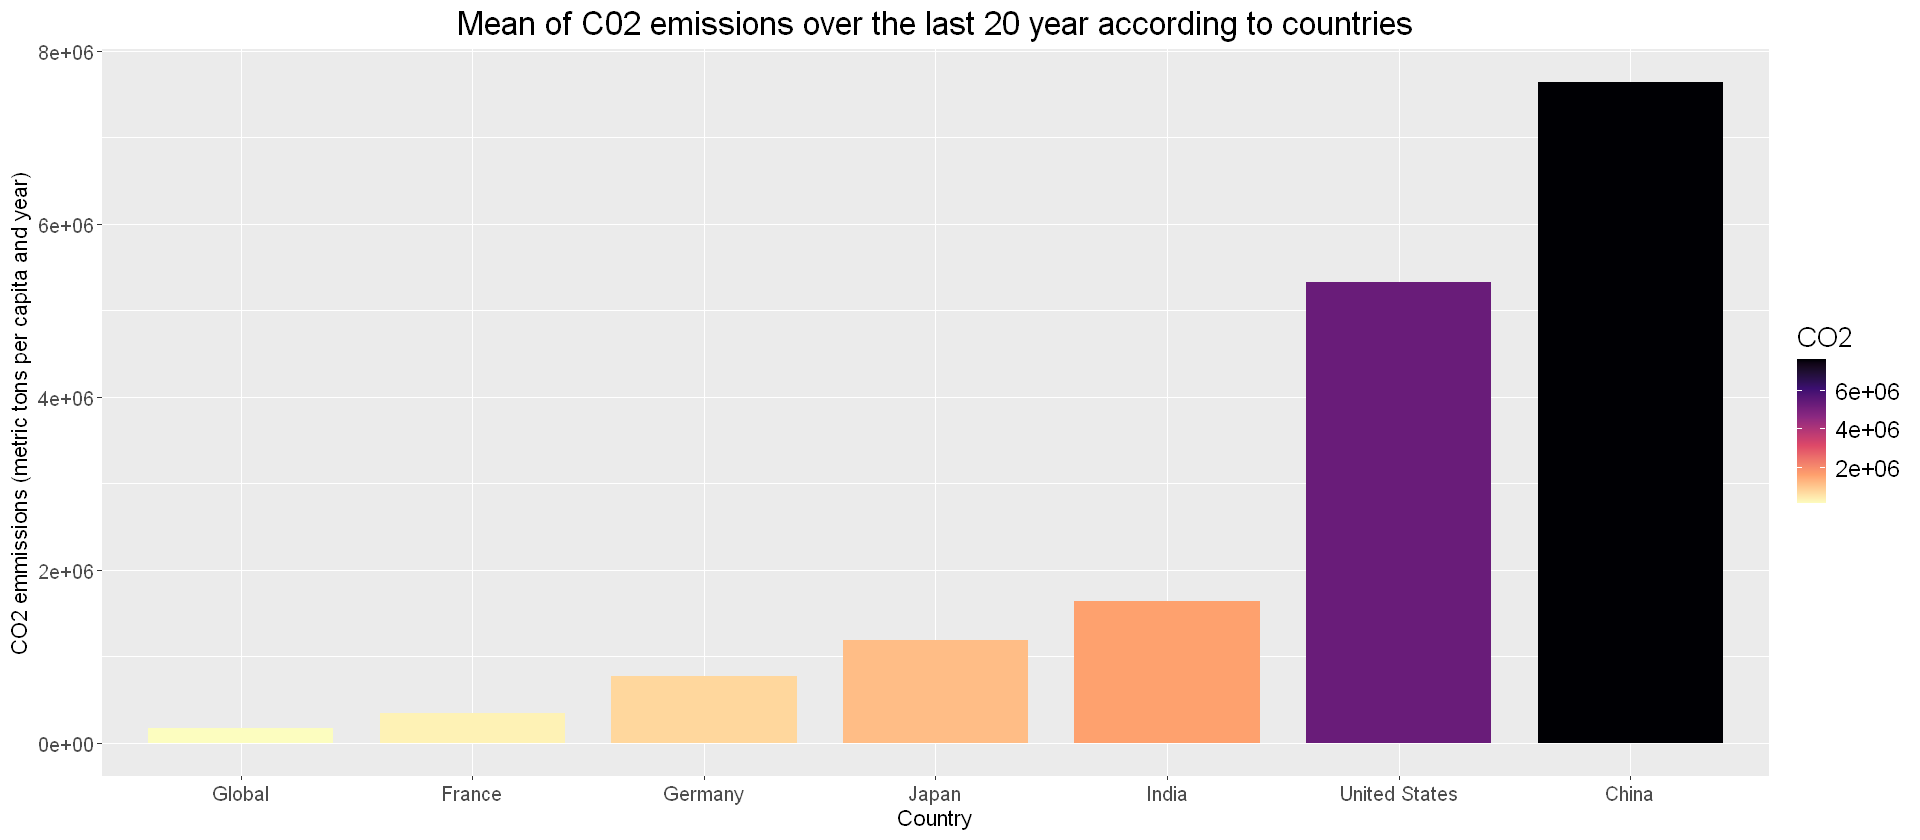

In [11]:
options(repr.plot.width = 16)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Country <- energy$Entity
df_mean <- summarise(group_by(df, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
df <- data.frame(Country = Country, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
top_5 <- head(df, 5)
last_5 <- tail(df,5)
moyenne <- mean(df$CO2)
mean <- data.frame("Country" = "Global", "CO2" = moyenne)
df <- rbind(top_5, fr)
df <- rbind(df,mean)
#df <- rbind(df,last_5)
ggplot(df, aes(x=reorder(Country, CO2), y=CO2, fill=CO2)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  labs(title = "Mean of C02 emissions over the last 20 year according to countries", x = "Country", y = "CO2 emmissions (metric tons per capita and year)") +
  theme(plot.title = element_text(size = 20, hjust = 0.5), 
        axis.text.y = element_text(size = 12),
        axis.title.y = element_text(size = 13),
        axis.text.x = element_text(size = 12),
       axis.title.x = element_text(size = 13),
       legend.text = element_text(size = 14),  # Ajuster la taille du texte de la légende
       legend.title = element_text(size = 16),  # Ajuster la taille du titre de la légende
       legend.position = "right") + 
       scale_fill_viridis_c(option = "A", direction = -1)

Le chargement a nécessité le package : viridisLite


Attachement du package : 'viridis'


L'objet suivant est masqué depuis 'package:maps':

    unemp




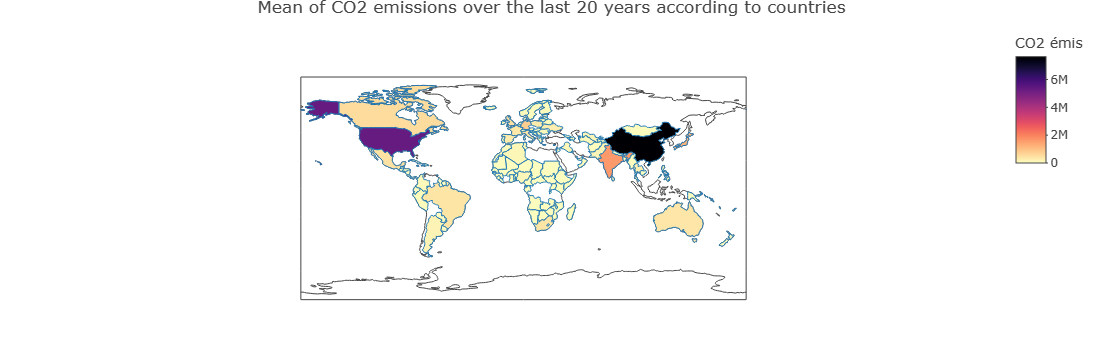

In [7]:
##### attention, par personne ou pas ? /density * area
library(viridis)
options(repr.plot.width = 16)
dfa <- energy$Value_co2_emissions_kt_by_country
dfa <-  matrix(dfa, nrow = 2868)
dfa <- as.data.frame(dfa)
colnames(dfa) = list("CO2")
dfa$Country <- energy$Entity
df_mean <- summarise(group_by(dfa, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
dfa <- data.frame(Country = Country, CO2 = CO2)
plot_ly(data = dfa, type = "choropleth", locations = ~Country, locationmode = "country names", z = ~CO2, text = ~paste("Pays: ", Country, "<br>CO2 emissions (metric tons per capita and year): ", CO2),colors = viridis(100, direction = -1, option ="A")) %>%
  colorbar(title = "CO2 émis",colors = viridis(100, direction = -1, option ="A")) %>%
  layout(title = "Mean of CO2 emissions over the last 20 years according to countries")

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidt

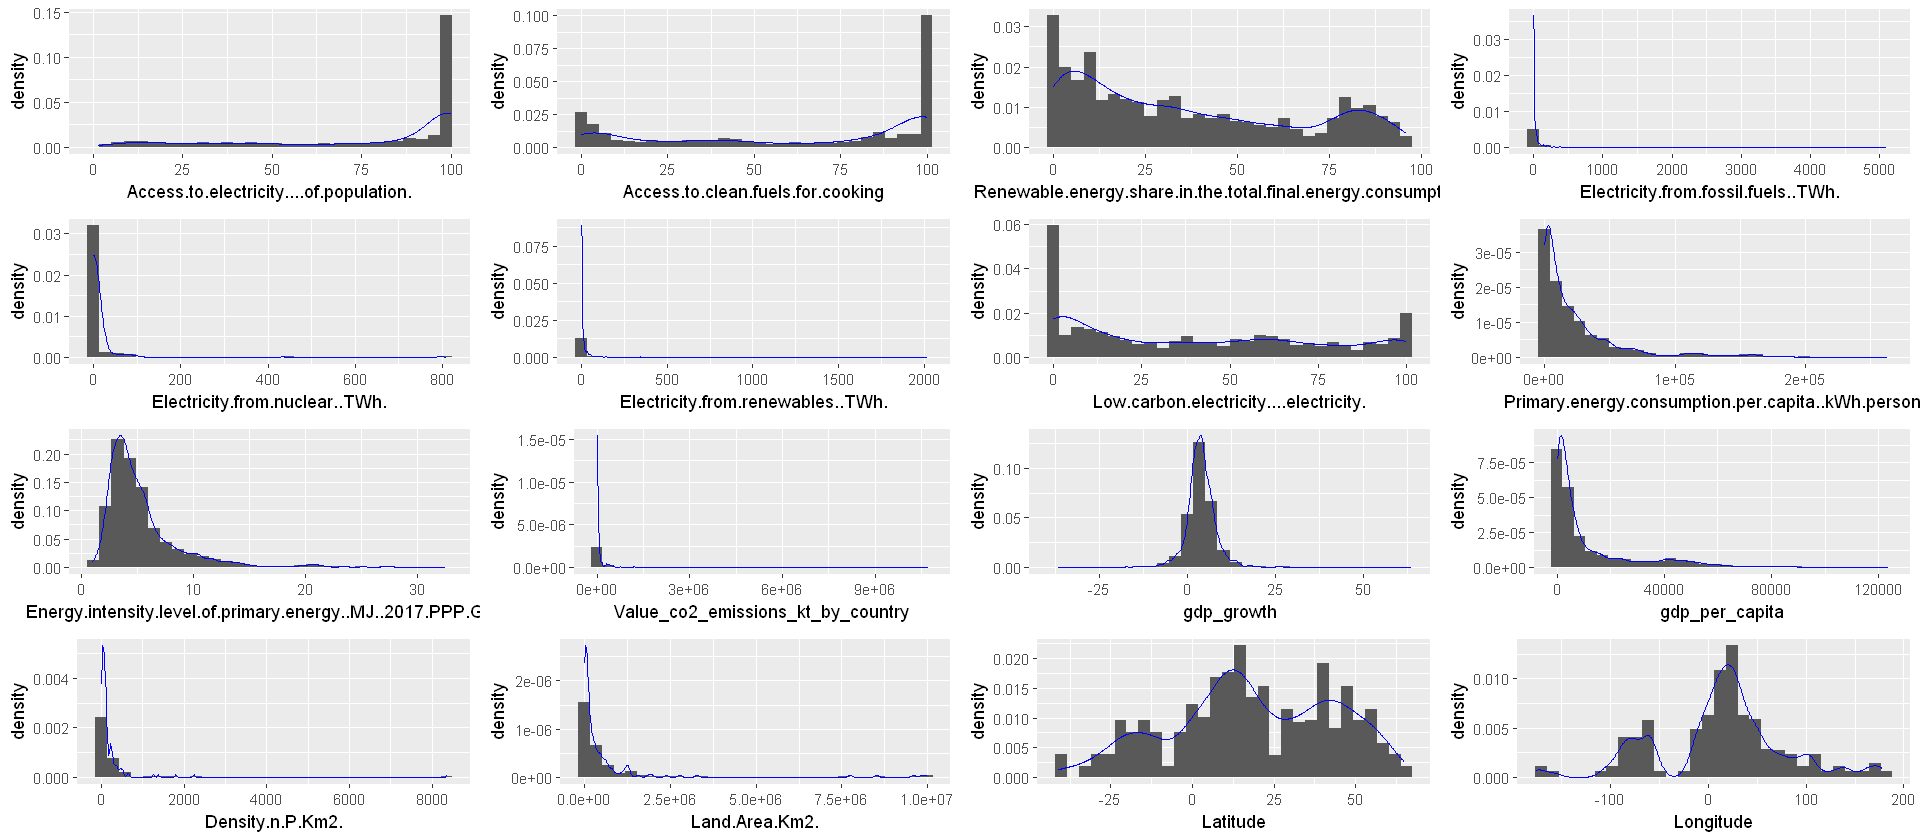

In [12]:
## que des variables quantitatives mis à part Entity et Year
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

In [13]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- log(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."]) ### si je fais log pour electricity et pas sqrt, j'ai des pb lors de l'acp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

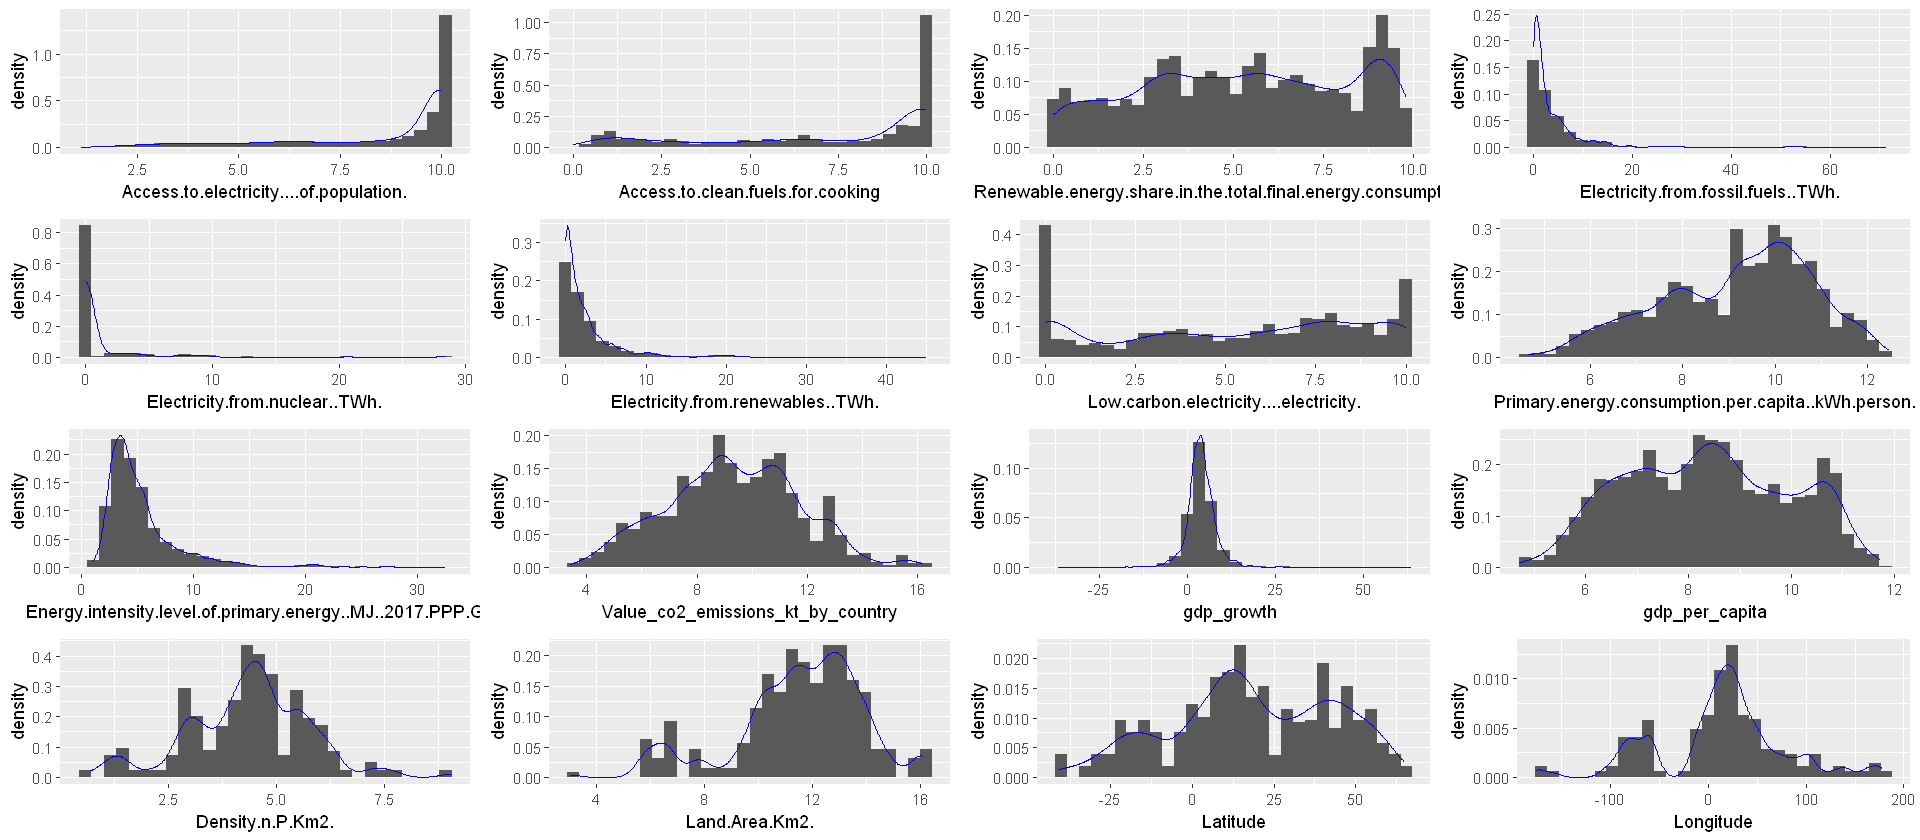

In [14]:
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

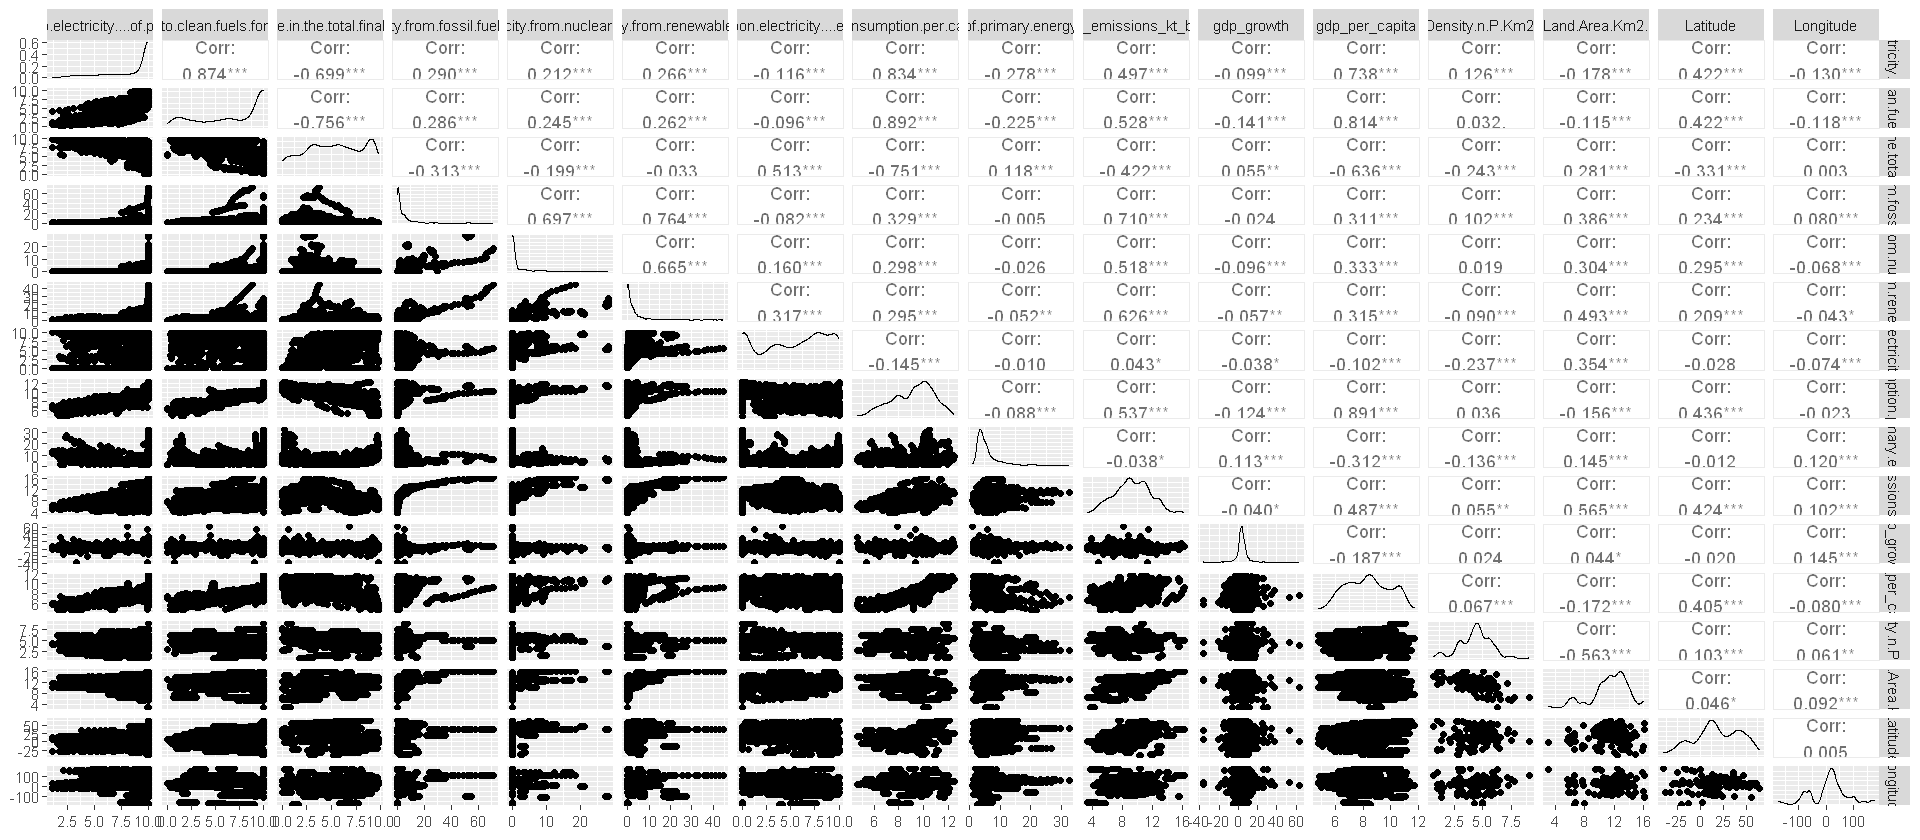

In [11]:
ggpairs(energy[, c(3:18)])

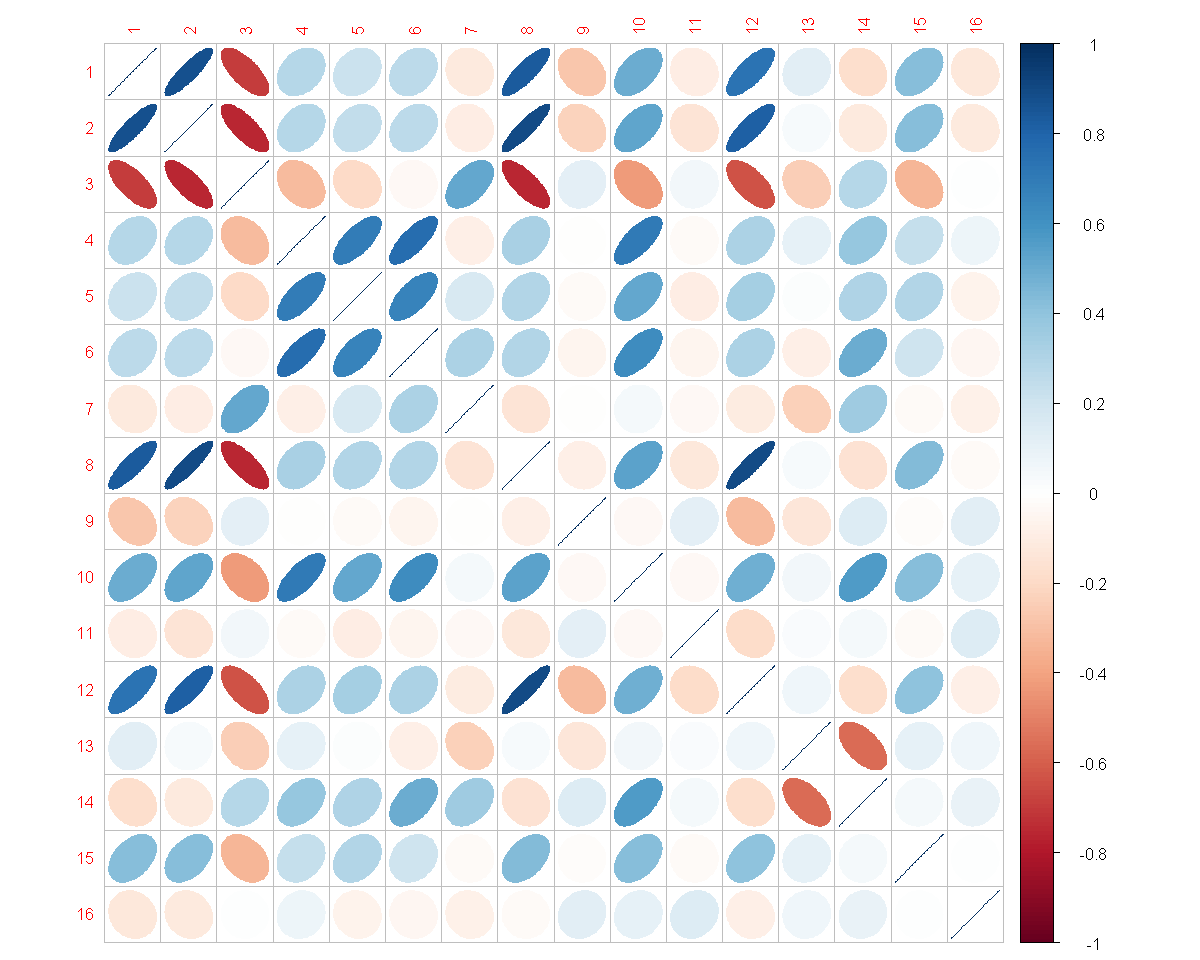

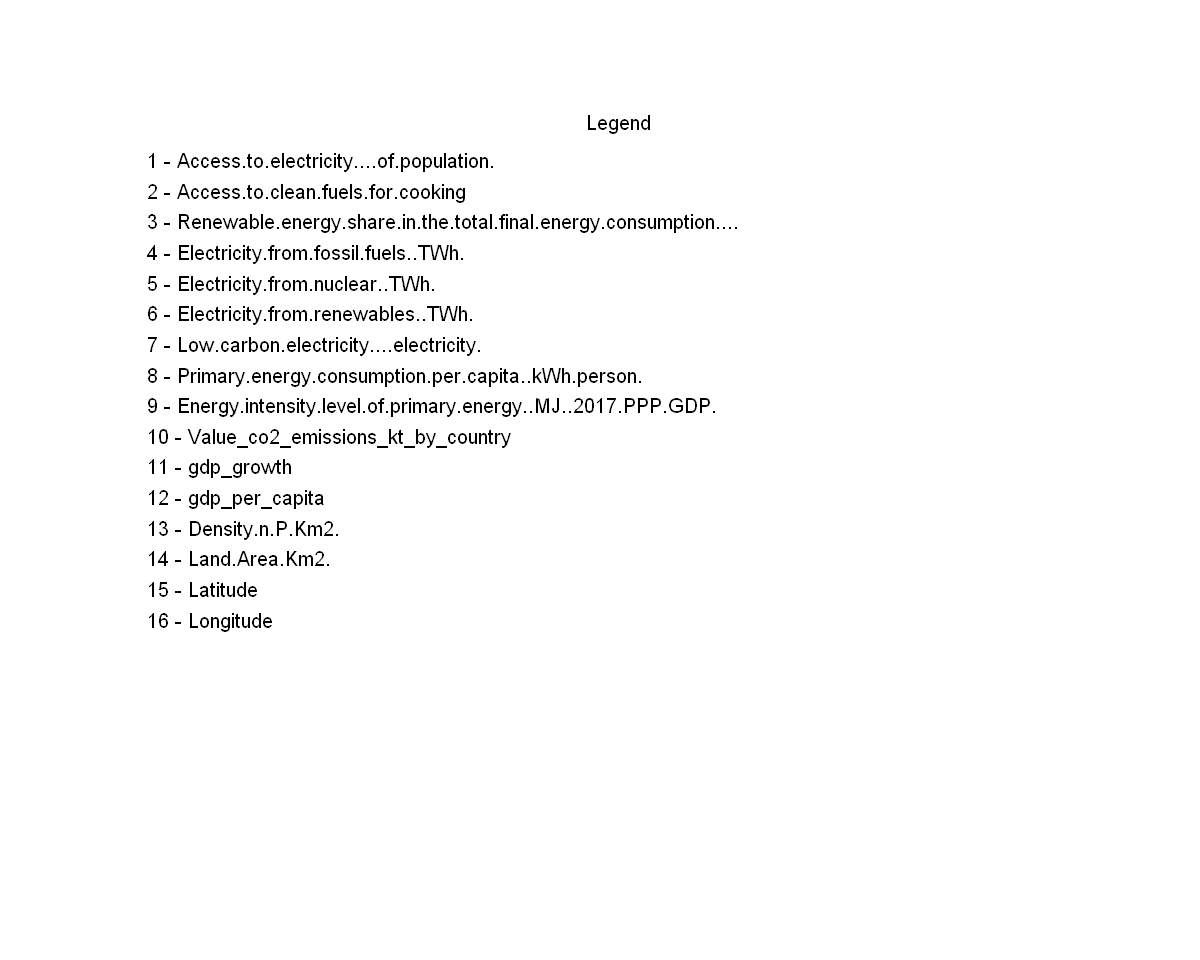

In [12]:
library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 8)
energy2 <- energy
original_names <- colnames(energy2)[3:18]
# Renommer les colonnes
colnames(energy2)[3:18] <- 1:16

# Matrice de corrélation
cor_matrix <- cor(energy2[, c(3:18)])

# Afficher le corrplot avec une taille de police plus grande pour les noms de variables
corrplot(cor_matrix, method = "ellipse", tl.cex = 0.8)

# Légende pour montrer la correspondance entre les numéros et les noms originaux des variables
plot.new()
legend_names <- c(paste(1:16, " - ",original_names, sep = ""))
legend("topright", legend = legend_names, title = "Legend", cex = 1, bty = "n", col = "black")

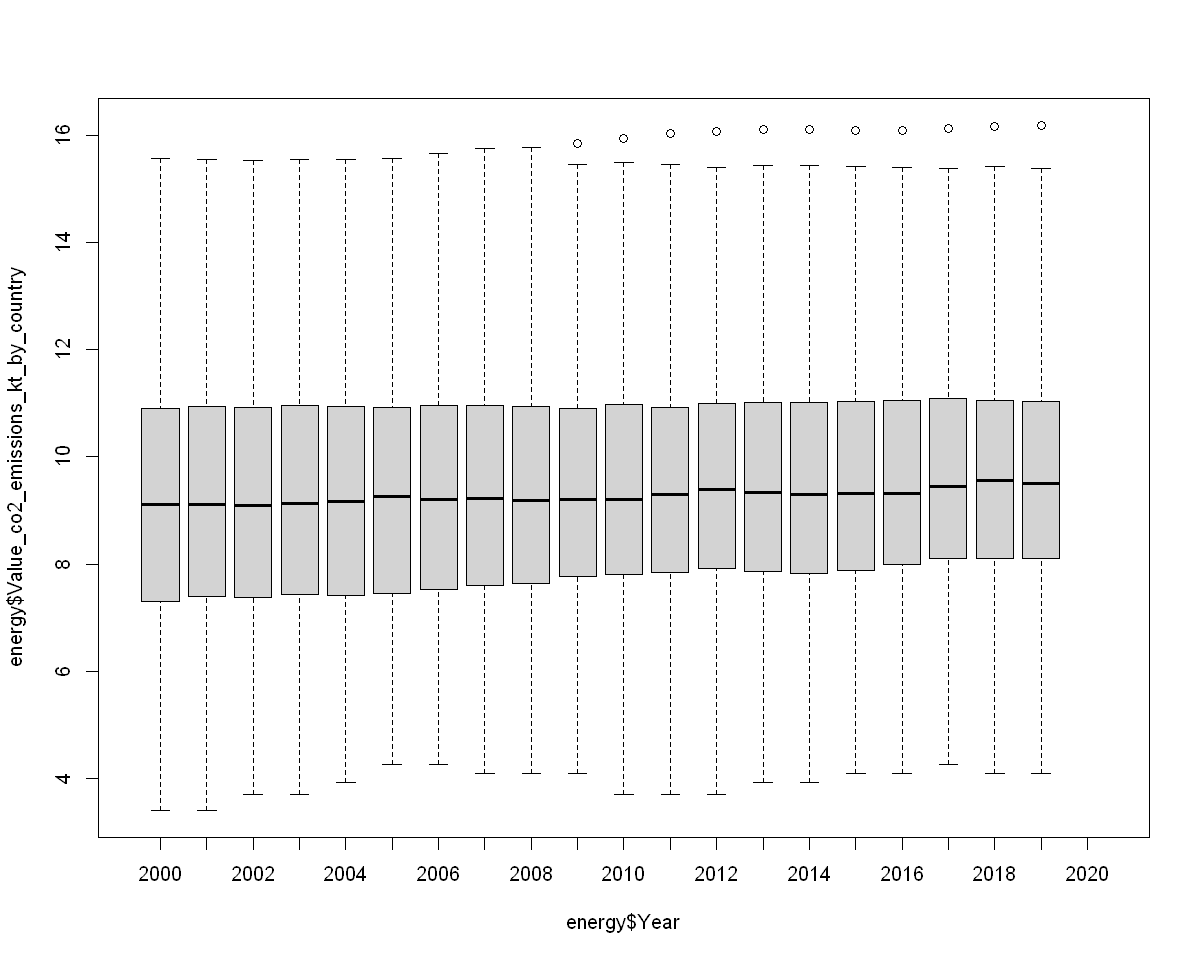

In [13]:
boxplot(energy$Value_co2_emissions_kt_by_country ~ energy$Year, data=energy)

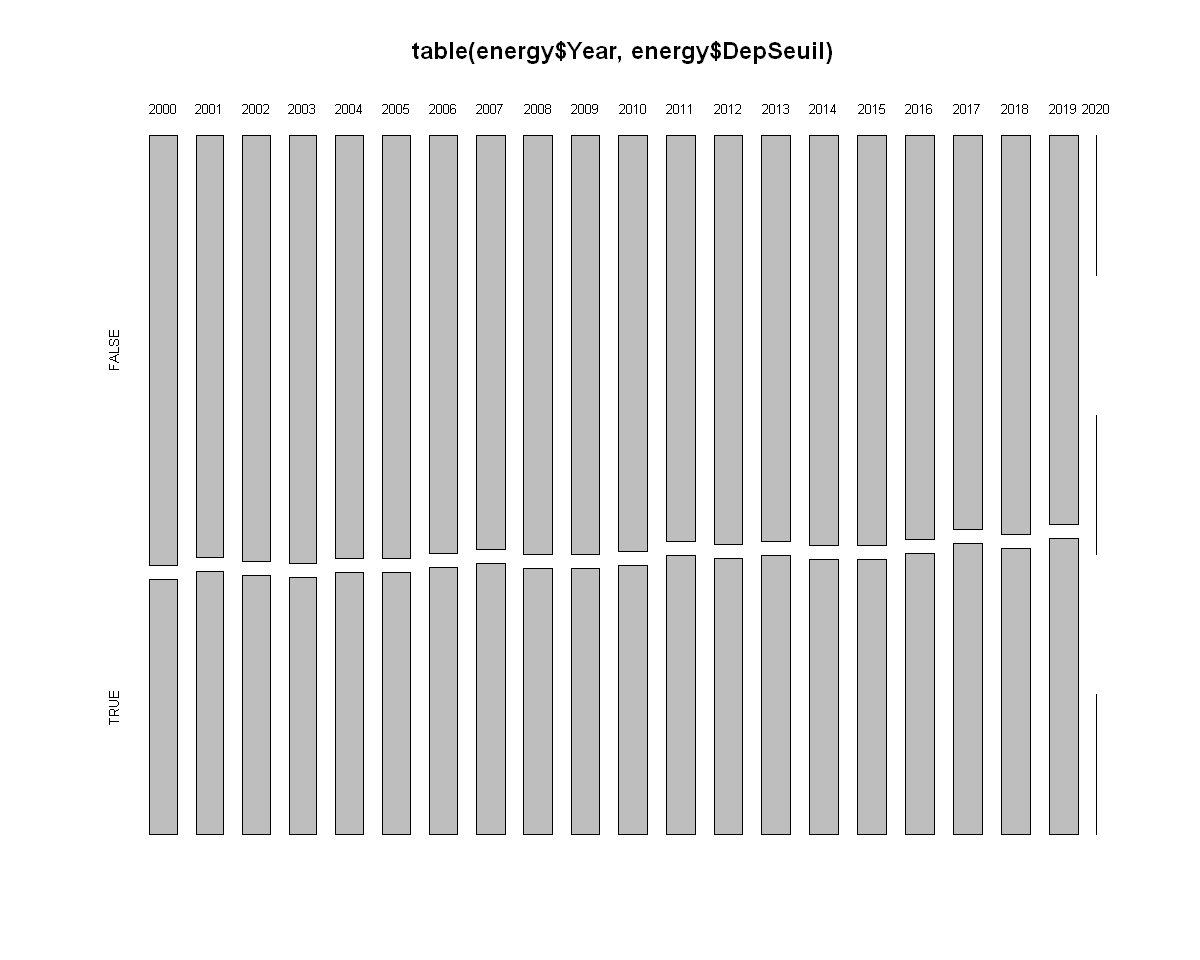

In [14]:
### O3obs en fonction des variables qualitatives
energy$DepSeuil <- as.factor(energy[, "Value_co2_emissions_kt_by_country"] > 10)
mosaicplot(table(energy$Year,energy$DepSeuil))

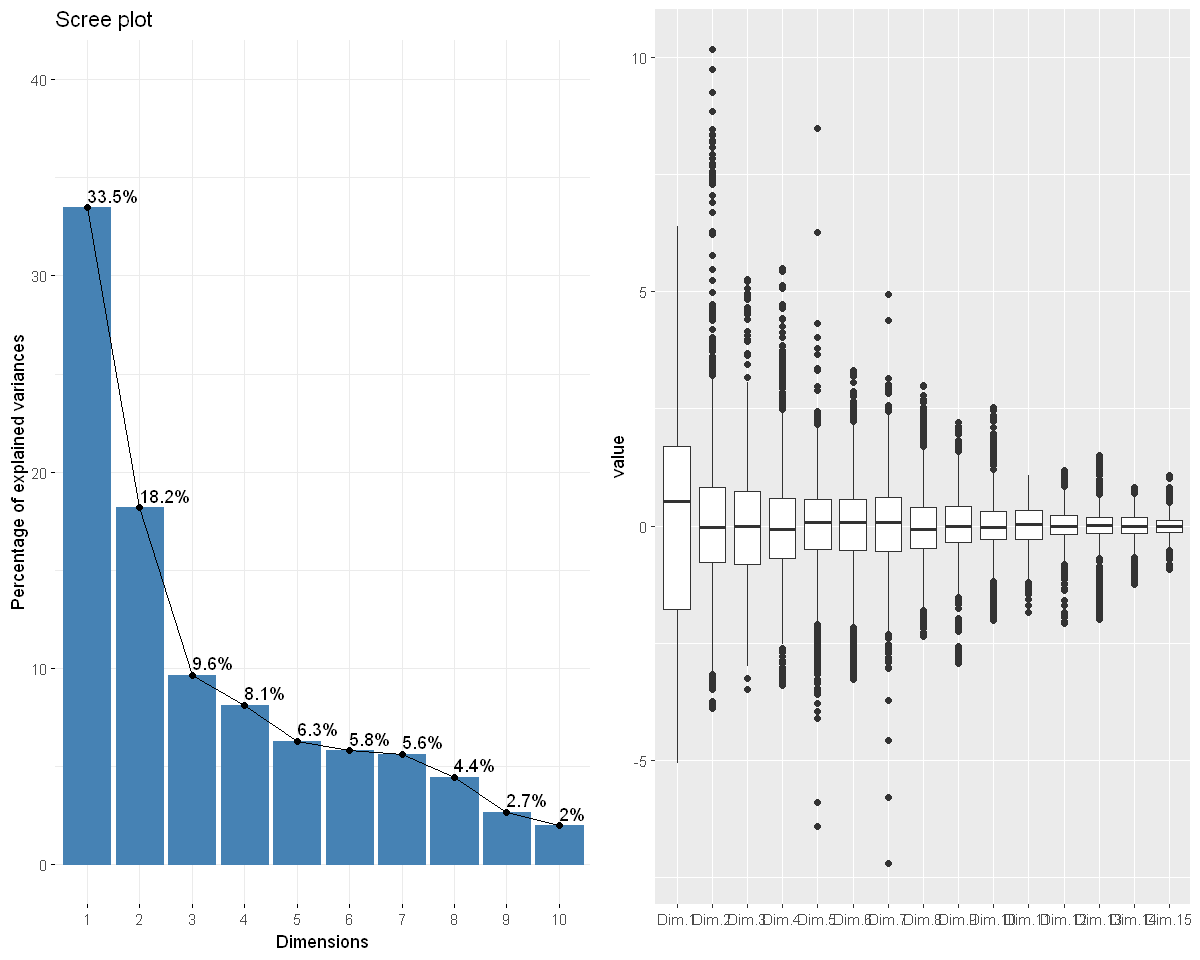

In [15]:
library(FactoMineR)
acp <- PCA(energy, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(1,2,19), quanti.sup = 12, ncp = 15)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

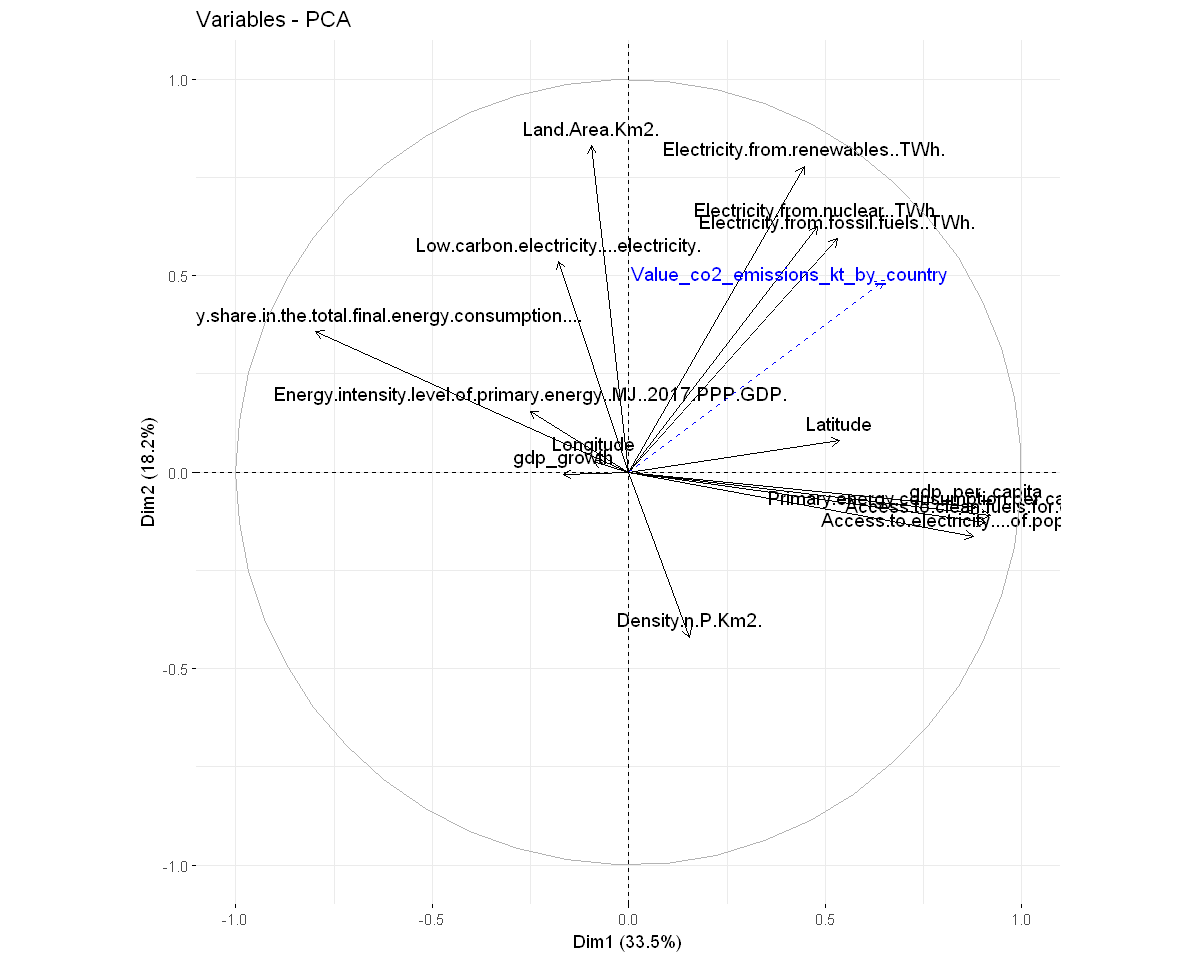

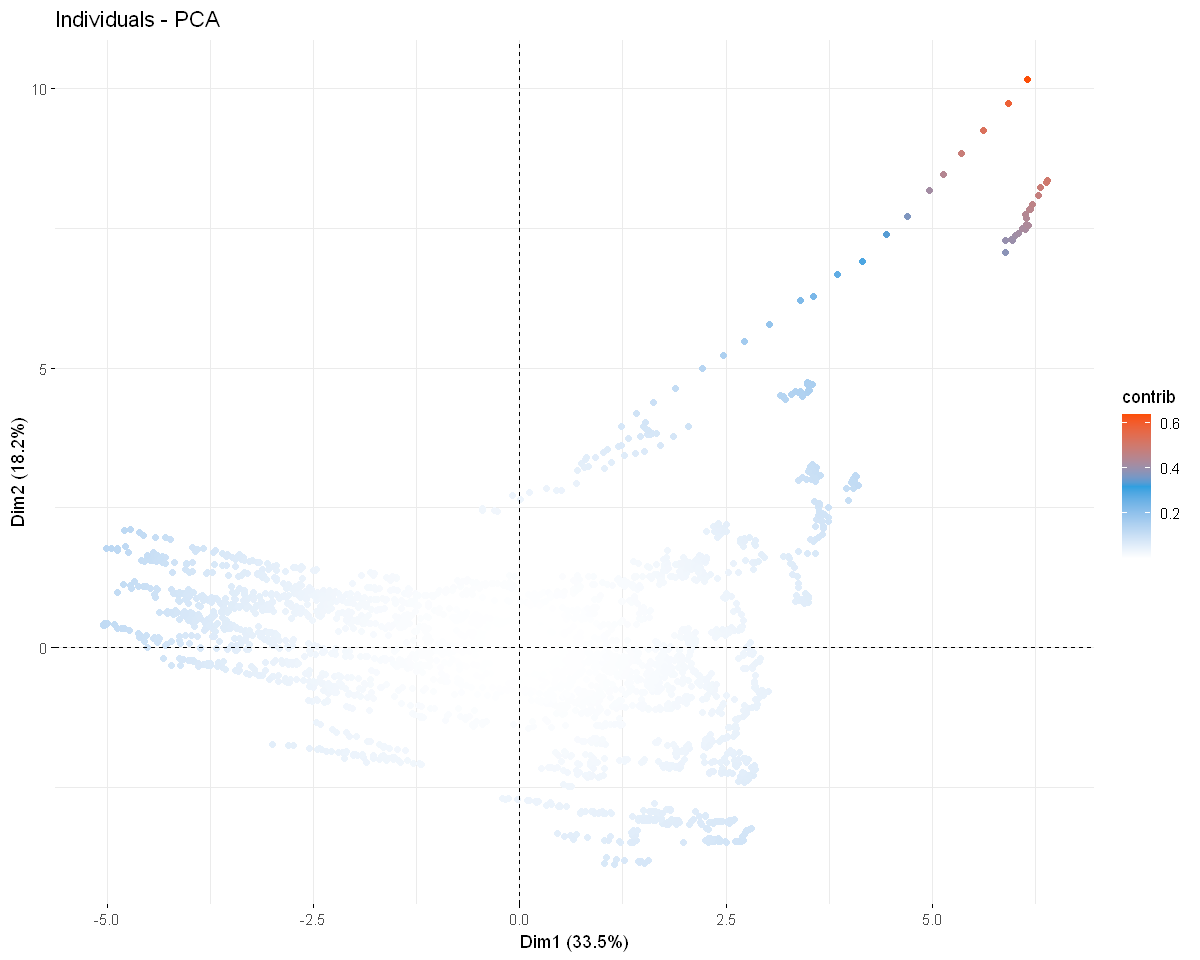

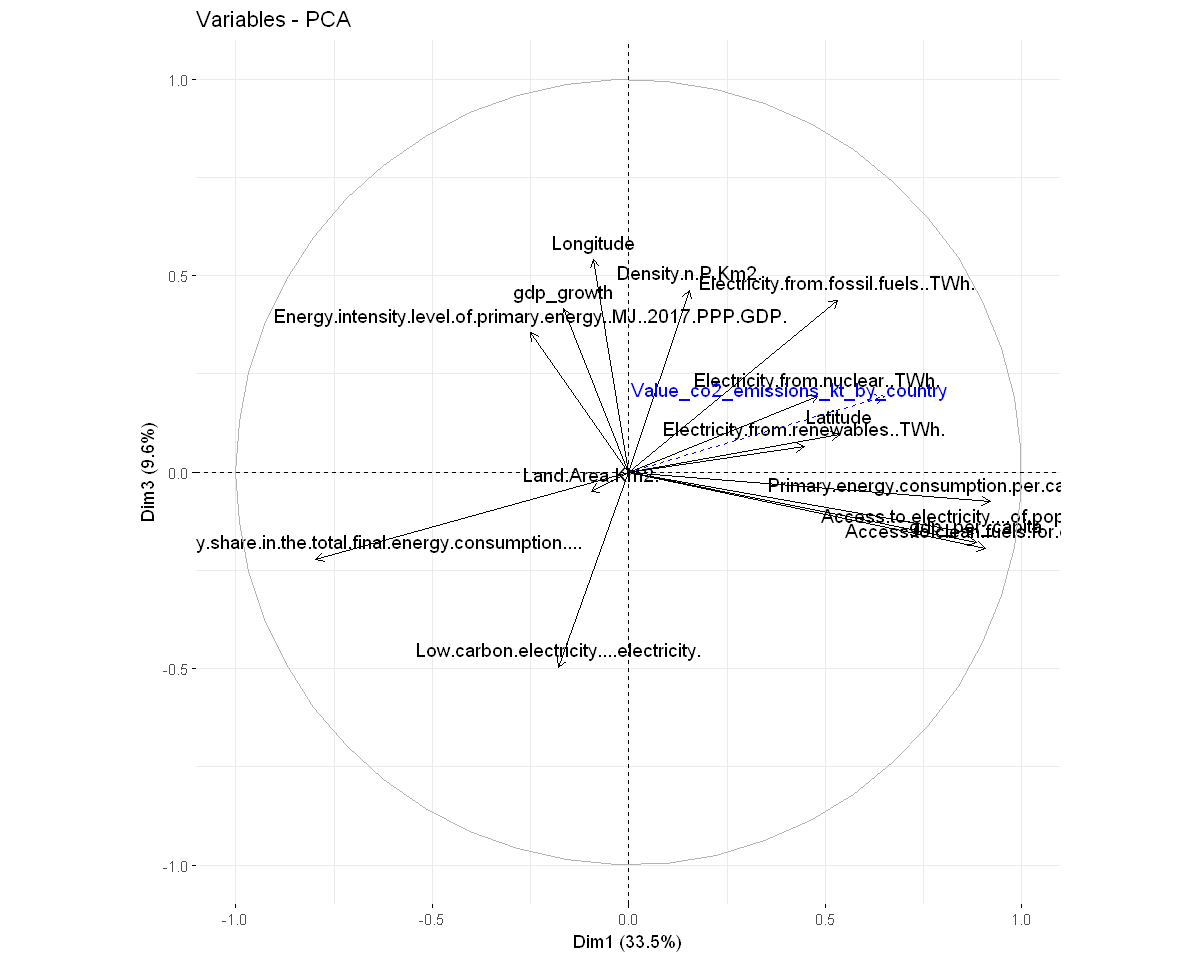

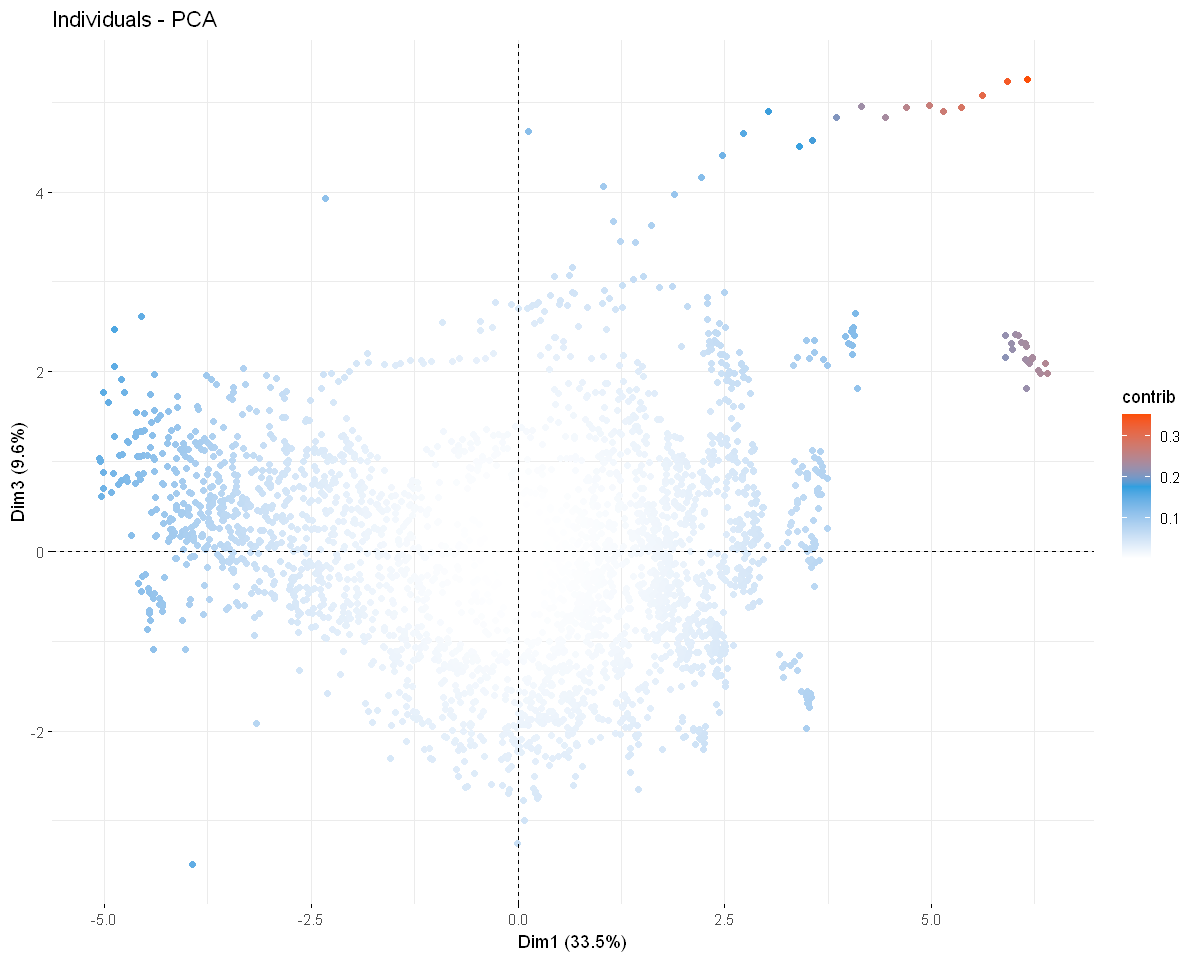

In [16]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

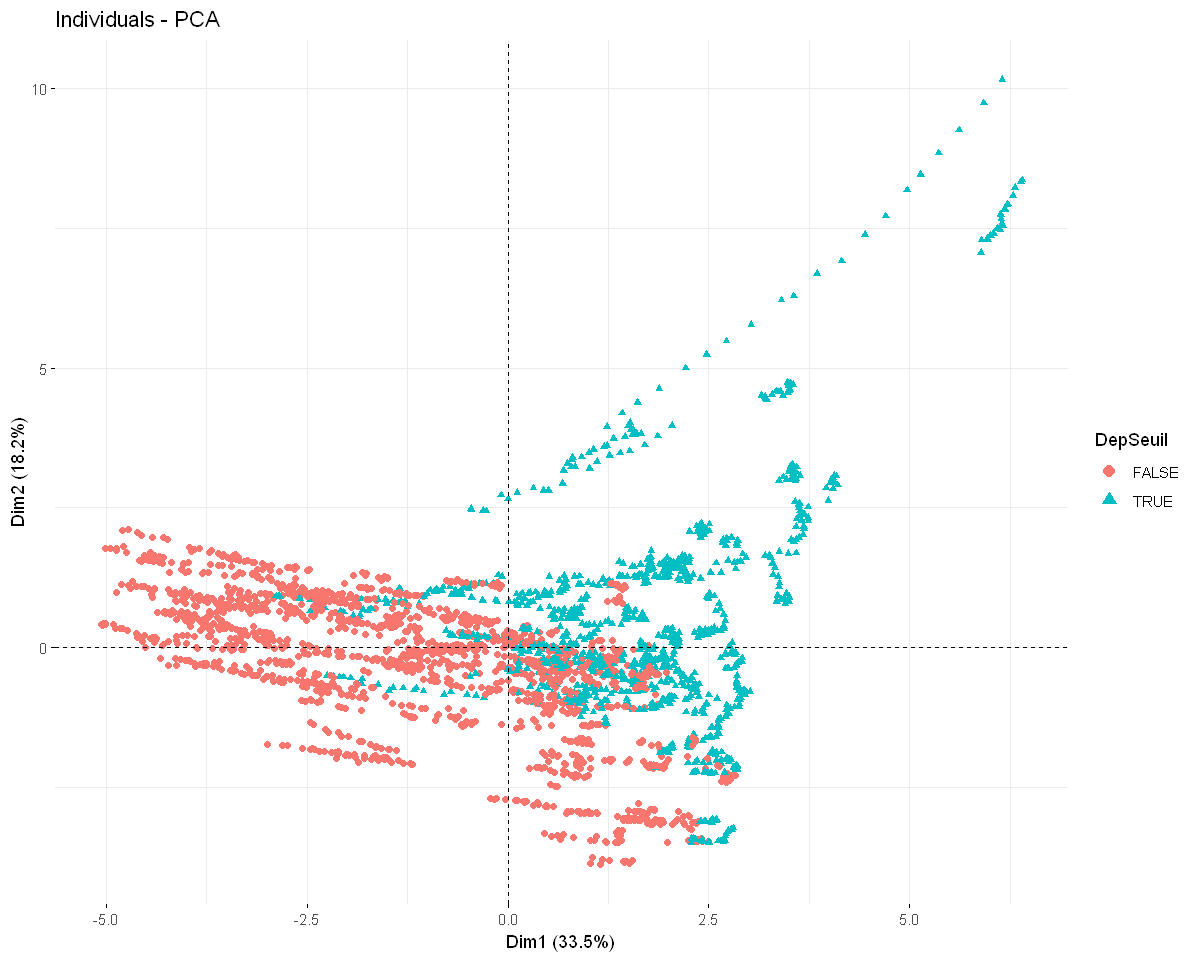

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '660' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '678' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '681' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '645' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '664' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '670' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '679' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '679' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '694' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '704' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '712' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '719' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '622' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '459' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '469' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '483' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '497' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '507' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '518' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '807' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '810' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '812' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '814' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '815' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '816' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '818' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '818' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '670' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '669' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '669' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '134' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '135' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '137' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '138' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '139' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '141' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '204' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '205' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '206' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '207' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '208' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '209' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '210' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '211' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '274' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '275' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '276' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '277' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '278' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '279' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '280' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '281' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '344' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '345' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '346' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '347' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '348' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '349' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '350' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '351' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '414' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '415' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '416' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '417' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '418' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '419' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '420' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '421' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '484' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '485' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '486' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '487' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '488' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '489' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '490' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '491' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '554' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '555' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '556' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '557' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '558' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '559' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '560' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '561' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '624' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '626' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '627' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '628' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '629' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '630' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '631' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '694' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '695' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '696' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '697' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '698' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '699' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '700' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '701' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '764' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '765' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '766' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '767' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '768' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '769' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '770' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '771' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '128' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '132' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '163' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '167' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '198' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '202' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '233' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '237' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '268' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '272' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '303' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '307' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '338' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '342' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '373' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '377' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '408' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '412' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '443' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '447' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '478' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '482' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '513' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '517' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '548' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '552' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '583' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '587' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '618' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '622' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '653' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '657' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '688' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '692' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '723' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '727' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '758' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '762' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '793' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '797' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

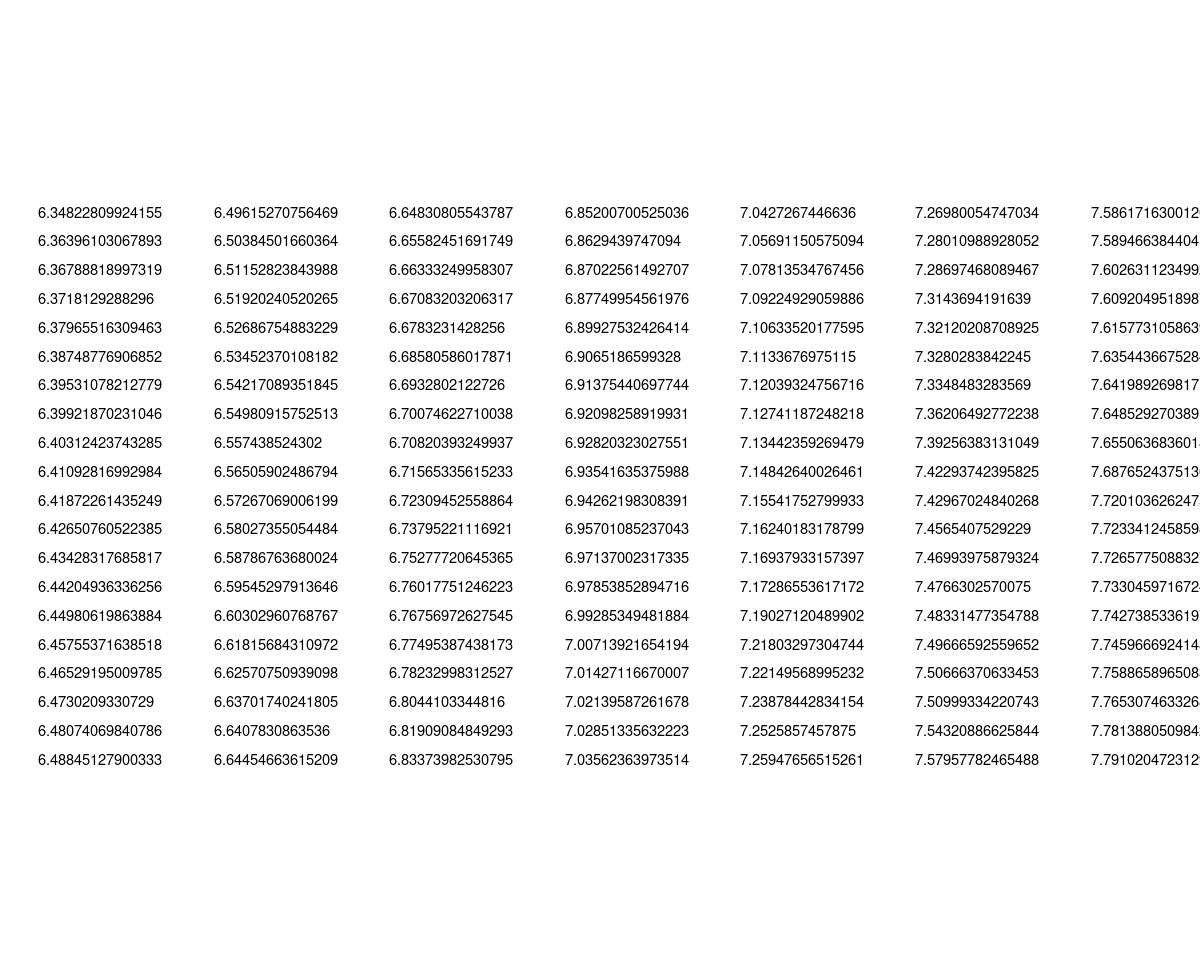

In [19]:
fviz_pca_ind(acp, label="none", habillage=19)

In [15]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(energy) # nombre de lignes dans les données
nvar <- ncol(energy) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

### pour CO2 emissions
datappr <- energy[appri, -c(6,19)] 
# construction de l'échantillon test
datestr <- energy[testi, -c(6,19)] 
# vérification
str(datappr)
str(datestr)
#summary(datappr) 

### pour DepSeuil
datappq <- energy[appri,-c(6,12)]
# construction de l'échantillon test 
datestq <- energy[testi,-c(6,12)] 

# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	2294 obs. of  17 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 8 9 10 11 12 14 15 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.04 6 6.51 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.49 3.91 4.09 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.82 5.36 4.6 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.768 0.866 0.735 ...
 $ Low.carbon.electricity....electricity.                          : num  8.19 7.93 7.96 8.89 8.6 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.

In [16]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 20)+ylim(-1.1, 1.1)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [36]:
### régression linéaire sans sélection de variable
reg.lm <- lm(Value_co2_emissions_kt_by_country ~ . , data = datappr)
summary(reg.lm)
anova(reg.lm,test="F")


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56411 -0.06640  0.00019  0.06507  1.14687 

Coefficients: (4 not defined because of singularities)
                                                                   Estimate
(Intercept)                                                       4.5298964
EntityAlgeria                                                     0.4849302
EntityAngola                                                      1.4174109
EntityAntigua and Barbuda                                        -5.6323139
EntityArgentina                                                   1.0842130
EntityArmenia                                                    -2.1050182
EntityAustralia                                                   1.0679193
EntityAustria                                                     0.1668015
EntityAzerbaijan                                                 -0.8053169
Entit

Df  
Entity                                                            147
Year                                                               19
Access.to.electricity....of.population.                             1
Access.to.clean.fuels.for.cooking                                   1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.nuclear..TWh.                                      1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1
gdp_growth                                                          1
gdp_per_capita                                                      1
Residuals                                                        2117
                                                                 Sum Sq      
Entity                                                           1.280084e+04
Year                                                             5.496231e+01
Access.to.electricity....of.population.                          2.659775e+01
Access.to.clean.fuels.for.cooking                                5.771252e+00
Renewable.energy.share.in.the.total.final.energy.consumption.... 2.421440e+01
Electricity.from.nuclear..TWh.                                   2.741196e-02
Electricity.from.renewables..TWh.                                9.285718e-03
Low.carbon.electricity....electricity.                           1.250762e+00
Primary.energy.consumption.per.capita..kWh.person.               1.587723e+01
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      7.036685e-02
gdp_growth                                                       1.323127e-01
gdp_per_capita                                                   4.579507e-02
Residuals                                                        4.119983e+01
                                                                 Mean Sq     
Entity                                                           87.080517787
Year                                                              2.892753344
Access.to.electricity....of.population.                          26.597751095
Access.to.clean.fuels.for.cooking                                 5.771251541
Renewable.energy.share.in.the.total.final.energy.consumption.... 24.214397169
Electricity.from.nuclear..TWh.                                    0.027411962
Electricity.from.renewables..TWh.                                 0.009285718
Low.carbon.electricity....electricity.                            1.250761603
Primary.energy.consumption.per.capita..kWh.person.               15.877232025
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.070366849
gdp_growth                                                        0.132312675
gdp_per_capita                                                    0.045795070
Residuals                                                         0.019461422
                                                                 F value     
Entity                                                           4474.5197158
Year                                                              148.6403871
Access.to.electricity....of.population.                          1366.6910199
Access.to.clean.fuels.for.cooking                                 296.5482919
Renewable.energy.share.in.the.total.final.energy.consumption.... 1244.2254627
Electricity.from.nuclear..TWh.                                      1.4085282
Electricity.from.renewables..TWh.                                   0.4771346
Low.carbon.electricity....electricity.                             64.2687664
Primary.energy.consumption.per.capita..kWh.person.                815.8310209
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         3.6157095
gdp_growth                                 

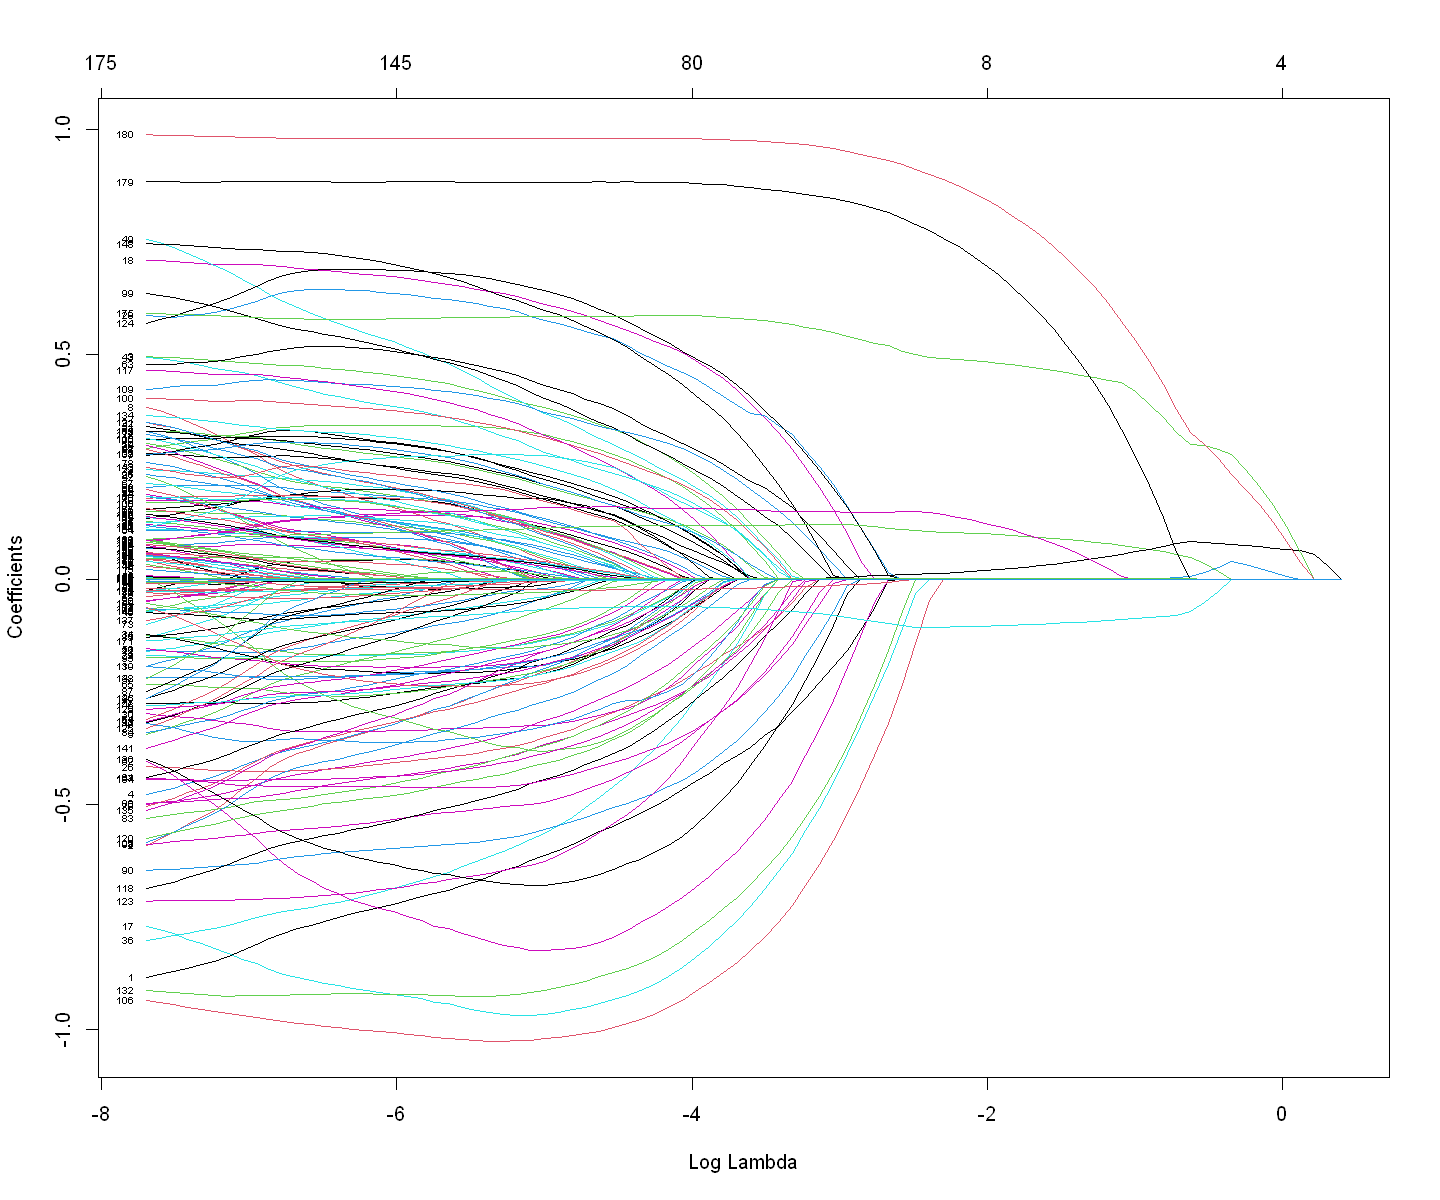

In [30]:
### Lasso
library(glmnet)
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Value_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("bottomright", 
      # legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

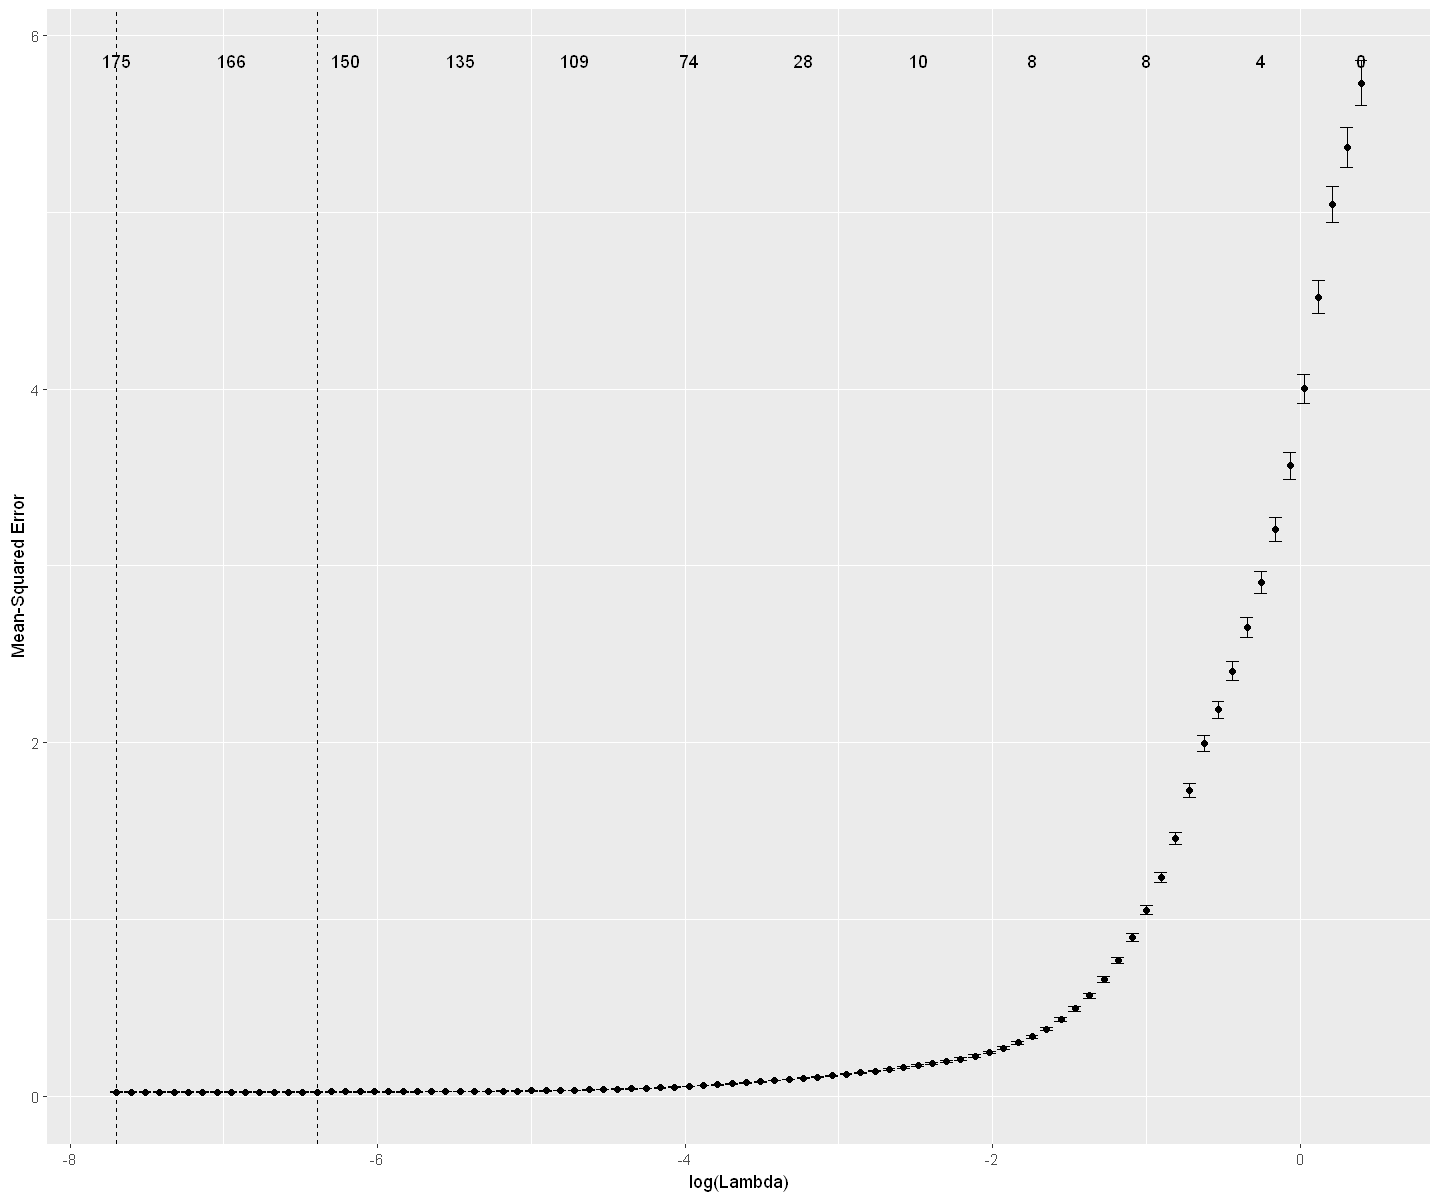

In [50]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 11], x = x.mat)
#plot(reg.lasso.cv)
autoplot(reg.lasso.cv)

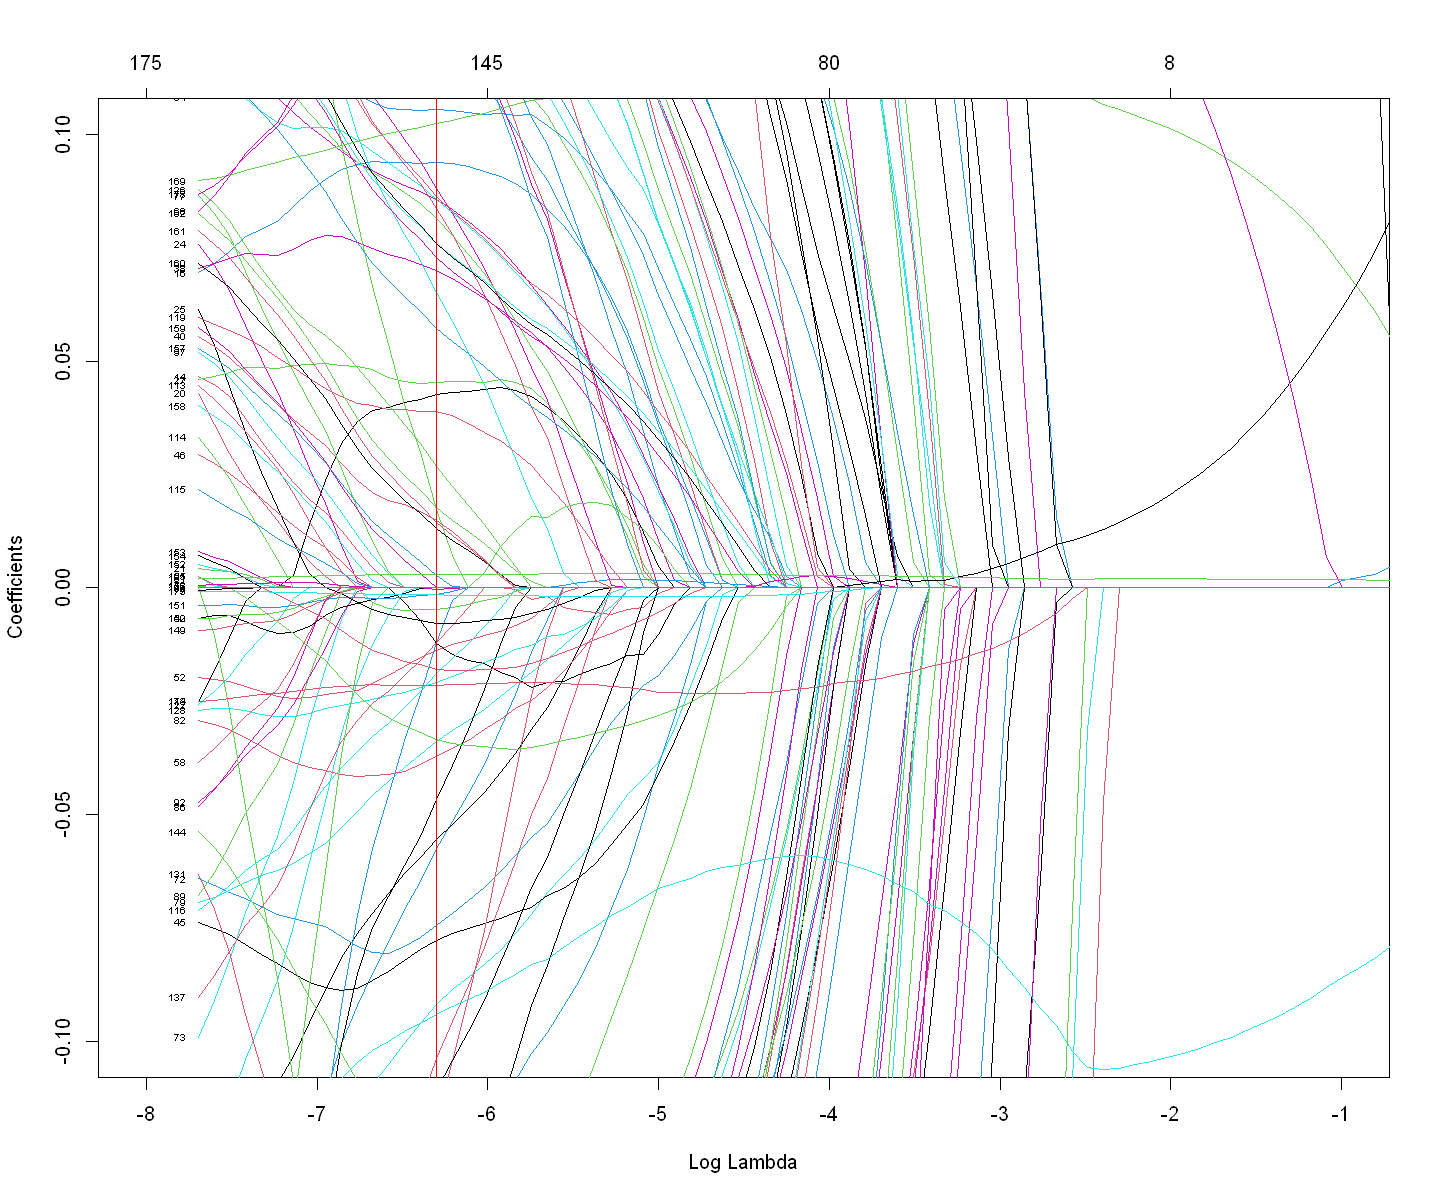

In [49]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-8,-1),ylim=c(-0.1,0.1))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

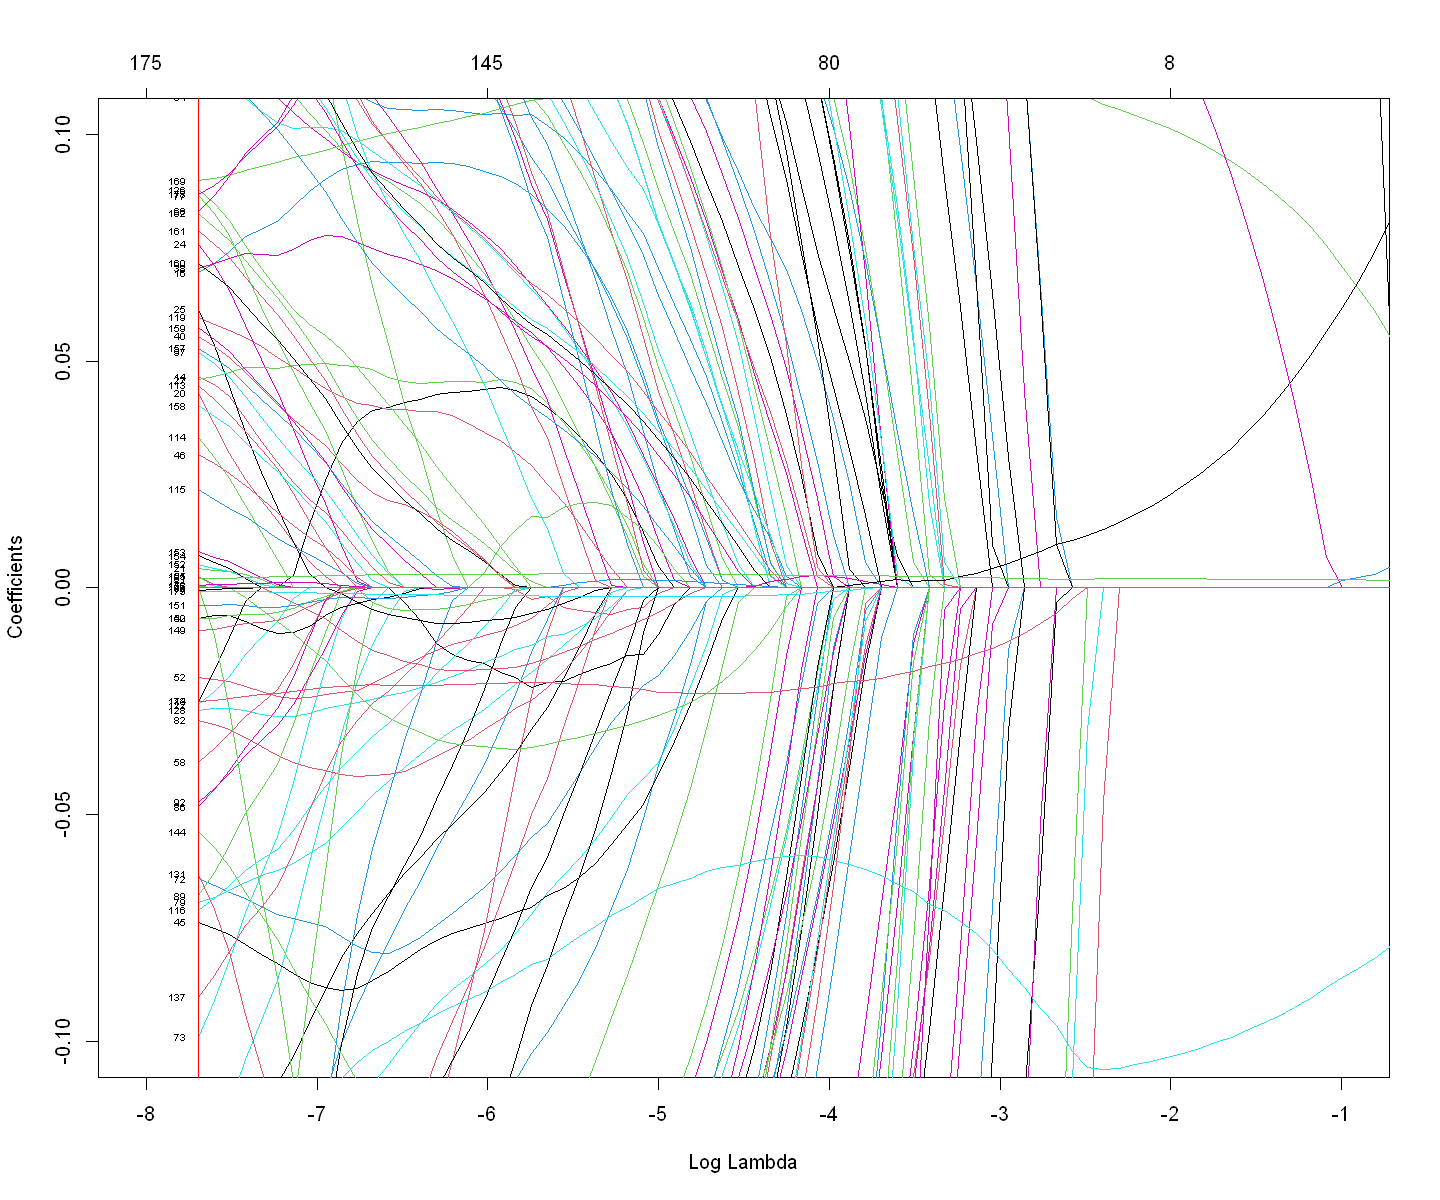

In [48]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-8,-1),ylim=c(-0.1,0.1))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

In [36]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Value_co2_emissions_kt_by_country-predict(aov(Value_co2_emissions_kt_by_country ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 0.02147169


Call:  cv.glmnet(x = x.mat, y = datappr[, 11]) 

Measure: Mean-Squared Error 

       Lambda Index Measure       SE Nonzero
min 0.0004547    88 0.02192 0.001522     175
1se 0.0018358    73 0.02339 0.001761     150


In [37]:
### critère AIC linéaire
reg.glm.step <- step(reg.lm, direction = "backward")
summary(reg.glm.step)
anova(reg.glm.step)

Start:  AIC=-8867
Value_co2_emissions_kt_by_country ~ Entity + Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude


Step:  AIC=-8867
Value_co2_emissions_kt_by_country ~ Entity + Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Entity + Year + 
    Access.to.electricity....of.population. + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.renewables..TWh. + Low.carbon.electricity....electricity. + 
    Primary.energy.consumption.per.capita..kWh.person. + gdp_growth + 
    gdp_per_capita, data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57355 -0.06581  0.00009  0.06492  1.14477 

Coefficients:
                                                                   Estimate
(Intercept)                                                       4.4815894
EntityAlgeria                                                     0.4482242
EntityAngola                                                      1.3912399
EntityAntigua and Barbuda                                        -5.6695606
EntityArgentina                                                   1.0496975
EntityArmenia                                    

Df  
Entity                                                            147
Year                                                               19
Access.to.electricity....of.population.                             1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
gdp_growth                                                          1
gdp_per_capita                                                      1
Residuals                                                        2120
                                                                 Sum Sq      
Entity                                                           1.280084e+04
Year                                                             5.496231e+01
Access.to.electricity....of.population.                          2.659775e+01
Renewable.energy.share.in.the.total.final.energy.consumption.... 2.952978e+01
Electricity.from.renewables..TWh.                                7.454615e-02
Low.carbon.electricity....electricity.                           1.170914e+00
Primary.energy.consumption.per.capita..kWh.person.               1.634677e+01
gdp_growth                                                       1.358456e-01
gdp_per_capita                                                   9.172570e-02
Residuals                                                        4.124906e+01
                                                                 Mean Sq    
Entity                                                           87.08051779
Year                                                              2.89275334
Access.to.electricity....of.population.                          26.59775110
Renewable.energy.share.in.the.total.final.energy.consumption.... 29.52977939
Electricity.from.renewables..TWh.                                 0.07454615
Low.carbon.electricity....electricity.                            1.17091393
Primary.energy.consumption.per.capita..kWh.person.               16.34677476
gdp_growth                                                        0.13584558
gdp_per_capita                                                    0.09172570
Residuals                                                         0.01945710
                                                                 F value    
Entity                                                           4475.512829
Year                                                              148.673378
Access.to.electricity....of.population.                          1366.994355
Renewable.energy.share.in.the.total.final.energy.consumption.... 1517.686273
Electricity.from.renewables..TWh.                                   3.831308
Low.carbon.electricity....electricity.                             60.179251
Primary.energy.consumption.per.capita..kWh.person.                840.144294
gdp_growth                                                          6.981798
gdp_per_capita                                                      4.714253
Residuals                                                                 NA
                                                                 Pr(>F)       
Entity                                                            0.000000e+00
Year                                                              0.000000e+00
Access.to.electricity....of.population.                          2.287915e-231
Renewable.energy.share.in.the.total.final.energy.consumption.... 7.404811e-251
Electricity.from.renewables..TWh.                                 5.043472e-02
Low.carbon.electricity....electricity.                            1.335332e-14
Primary.energy.consumption.per.capita..kWh.person.               6.855571e-156
gdp_growth                                                        8.294850e-03
gdp_per_capita                  

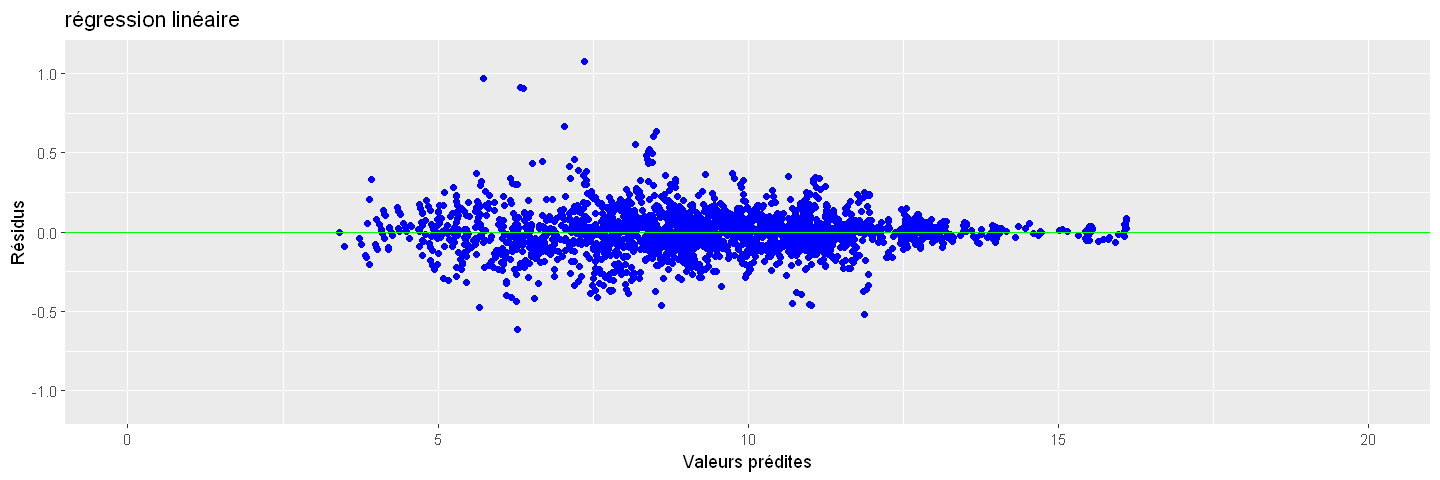

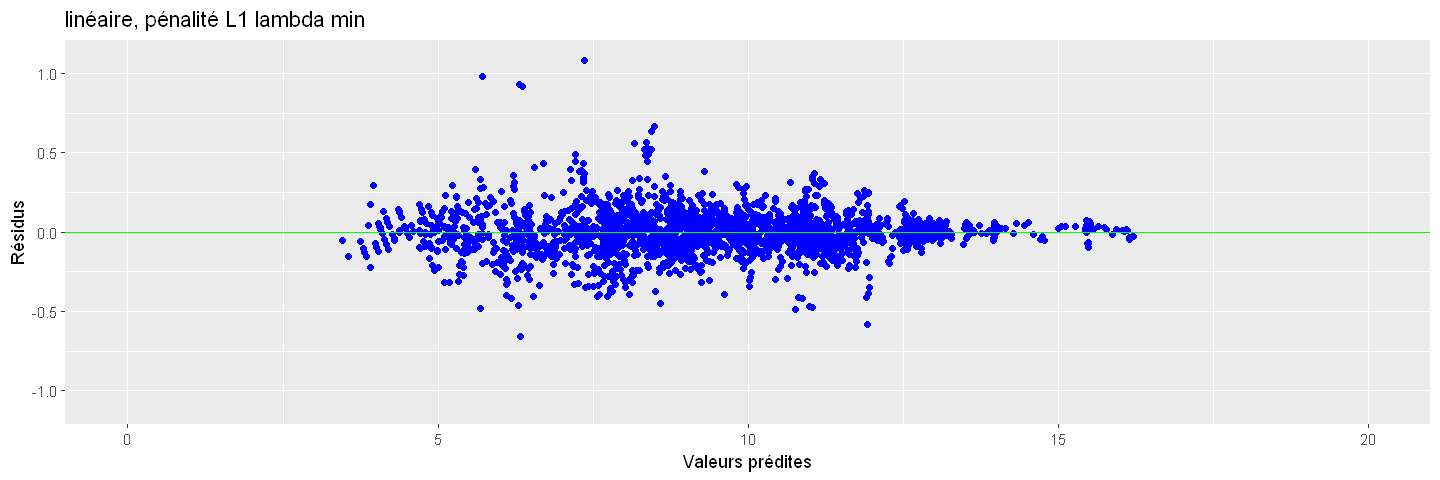

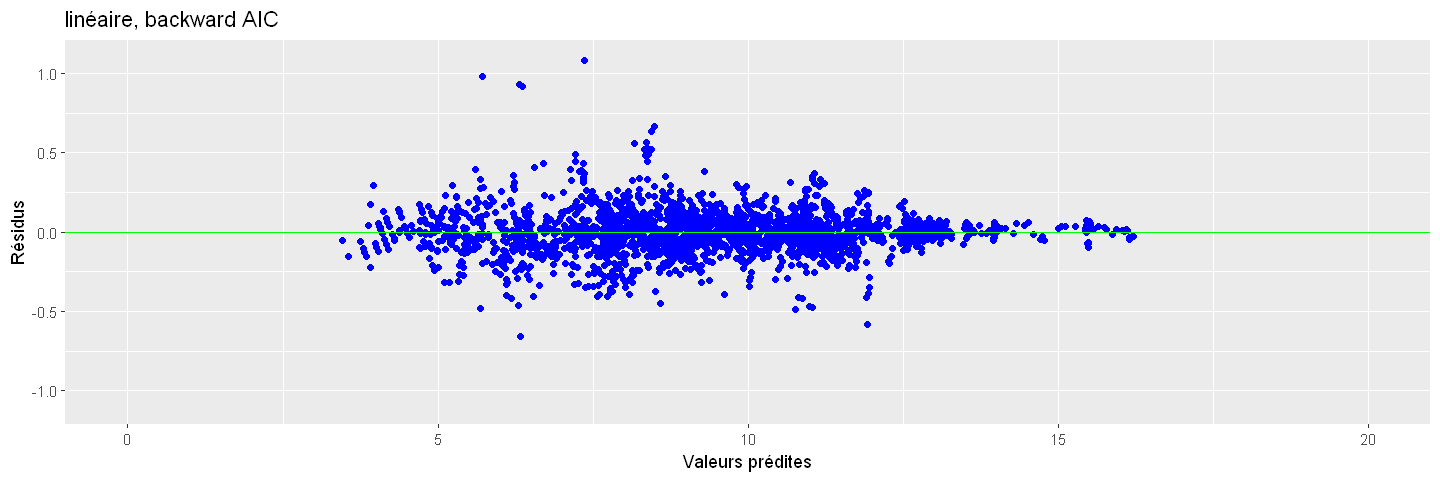

In [38]:
### linéaire pas de sélection
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
### Lasso lambda min
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Value_co2_emissions_kt_by_country - fit.lasso
### AIC
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
g1<-gplot.res(fit.lm, res.lm, "régression linéaire")
g2<-gplot.res(fit.lasso, res.lasso, "linéaire, pénalité L1 lambda min")
g3<-gplot.res(fit.lasso, res.lasso, "linéaire, backward AIC")
g1
g2
g3

In [39]:
# Calcul des prévisions pour le modèle linéaire complet
pred.glm <- predict(reg.lm, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.02047639

In [42]:
# Calcul des prévisions pour le modèle linéaire pénalisation Lasso
x.test <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datestr)
reg.lasso.cv.test <- cv.glmnet(y = datestr[, 11], x = x.test)
fit.lasso <- predict(reg.lasso.cv.test, s = "lambda.min", newx = x.test)
# Erreur quadratique moyenne de prévision (MSE)
sum((fit.lasso - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.01283334

In [43]:
# Calcul des prévisions pour le modèle linéaire backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.02042527

In [99]:
### Conclusion de partie 1 : le meilleur modèle est le Lasso

In [44]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0"

183 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -1.200322e+01
EntityAfghanistan                                                -8.836640e-01
EntityAlgeria                                                    -5.901947e-01
EntityAngola                                                      4.946350e-01
EntityAntigua and Barbuda                                        -4.765976e-01
EntityArgentina                                                  -1.283668e-01
EntityArmenia                                                    -4.990308e-01
EntityAustralia                                                   2.755293e-01
EntityAustria                                                     3.829920e-01
EntityAzerbaijan                                                 -3.440779e-01
EntityBahrain                                                    -1.929802e-01
EntityBan

In [18]:
library(e1071)

In [24]:
svm.reg.lin.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ ., type = "eps-regression", data = datappr, kernel = "lin", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5))
summary(svm.reg.lin.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.0296912 

- Detailed performance results:
  cost      error  dispersion
1  1.0 0.02969120 0.003050451
2  1.5 0.02977135 0.003177416
3  2.0 0.02977010 0.003184857
4  2.5 0.02972468 0.003112372
5  3.0 0.02974612 0.003086974
6  3.5 0.02978714 0.003055414
7  4.0 0.02976453 0.003036395
8  4.5 0.02980309 0.003024065
9  5.0 0.02979715 0.003049567


Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


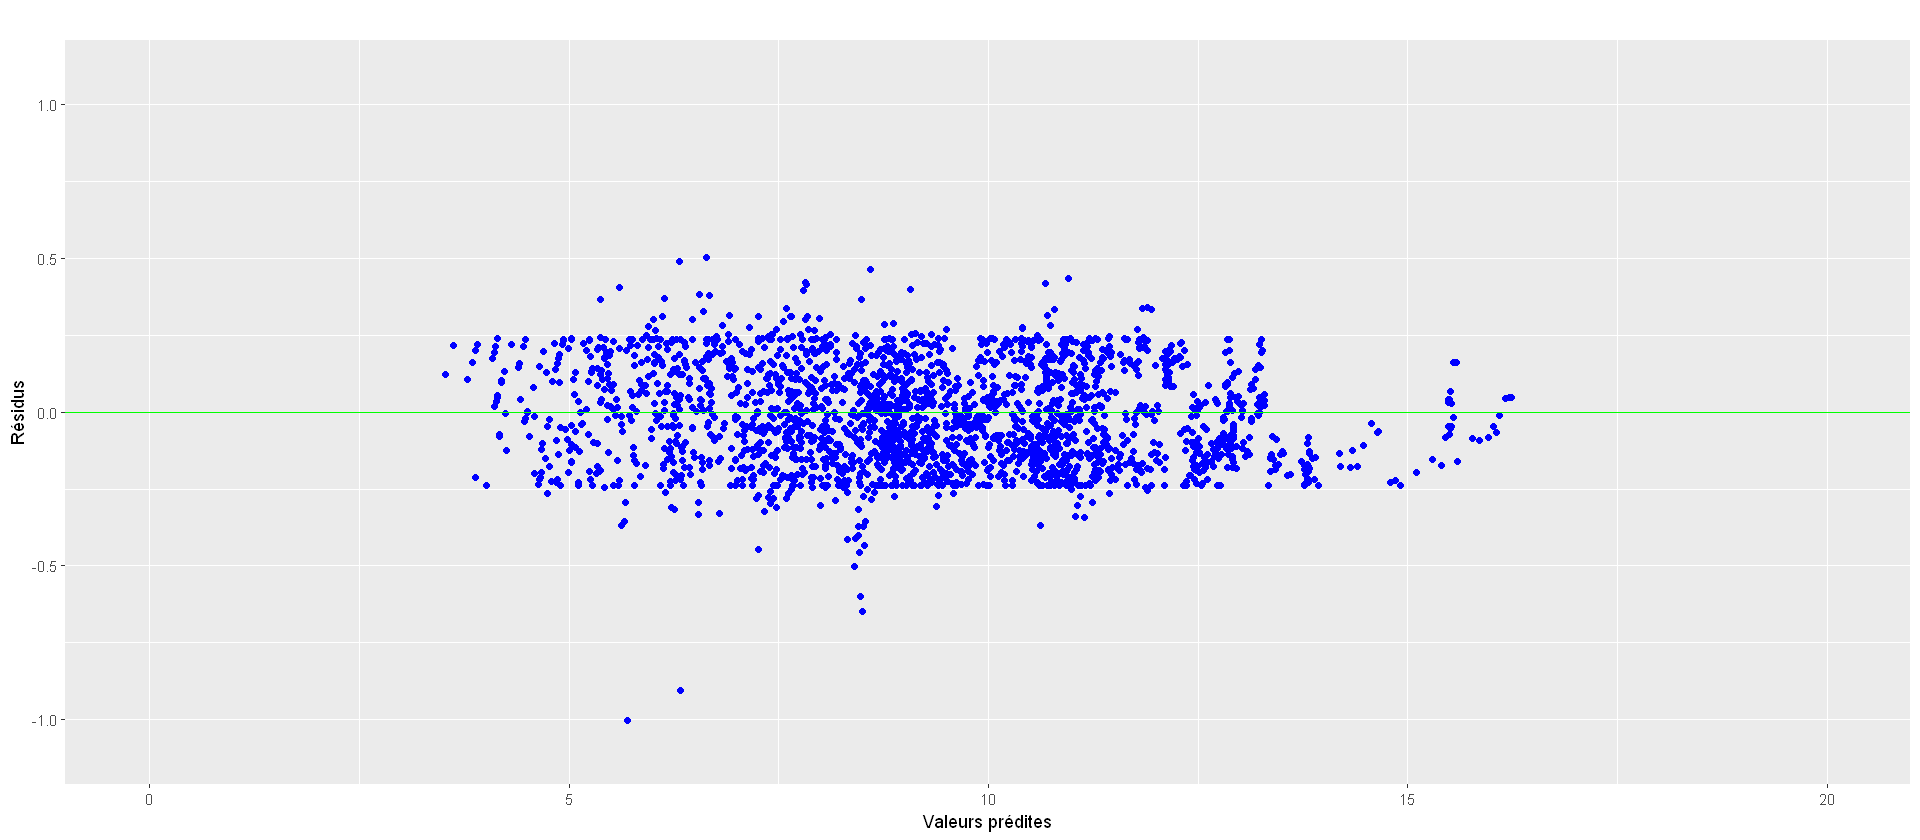

In [25]:
fit.svmr=svm.reg.lin.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [26]:
svm.reg.poly <- svm(Value_co2_emissions_kt_by_country ~ ., type = "eps-regression", data = datappr, kernel = "poly")
summary(svm.reg.poly)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr, 
    type = "eps-regression", kernel = "poly")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.005494505 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  2120






Warning message:
"Removed 1378 rows containing missing values or values outside the scale range (`geom_point()`)."


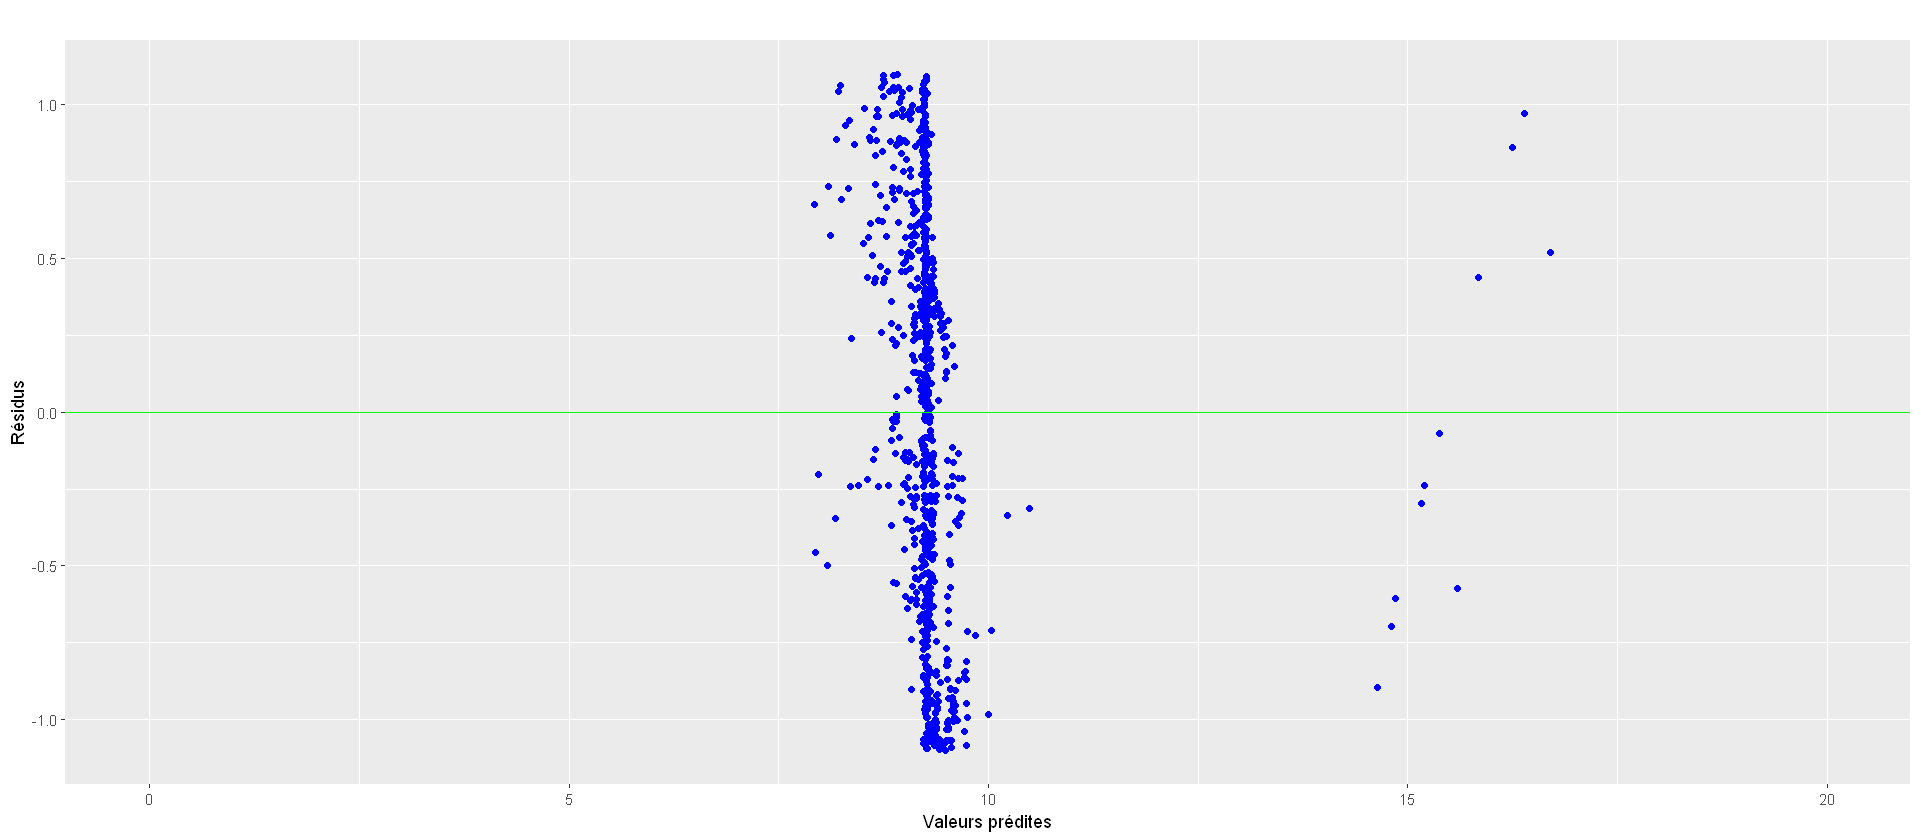

In [27]:
fit.svmr=svm.reg.poly$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [28]:
svm.reg.poly.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ ., type = "eps-regression", data = datappr, kernel = "poly", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5), coef0 = -5:5, gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.poly.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0 cost
  0.02     2    1

- best performance: 0.02639555 

- Detailed performance results:
    gamma coef0 cost        error   dispersion
1    0.02    -5  1.0 6.070925e+04 8.465350e+03
2    0.04    -5  1.0 1.203870e+06 2.081379e+05
3    0.06    -5  1.0 6.947815e+06 1.065282e+06
4    0.08    -5  1.0 2.651468e+07 3.908727e+06
5    0.10    -5  1.0 6.979247e+07 7.059984e+06
6    0.02    -4  1.0 4.438224e+04 1.173455e+04
7    0.04    -4  1.0 8.281725e+05 1.454666e+05
8    0.06    -4  1.0 5.098451e+06 9.645703e+05
9    0.08    -4  1.0 1.829414e+07 1.848975e+06
10   0.10    -4  1.0 4.730085e+07 4.209836e+06
11   0.02    -3  1.0 2.986679e+04 5.532918e+03
12   0.04    -3  1.0 5.638112e+05 8.489892e+04
13   0.06    -3  1.0 3.254346e+06 3.290181e+05
14   0.08    -3  1.0 1.103912e+07 9.446729e+05
15   0.10    -3  1.0 2.835362e+07 2.337783e+06
16   0.02    -2  1.0 1.396412e+04 2.971824e+03
17   

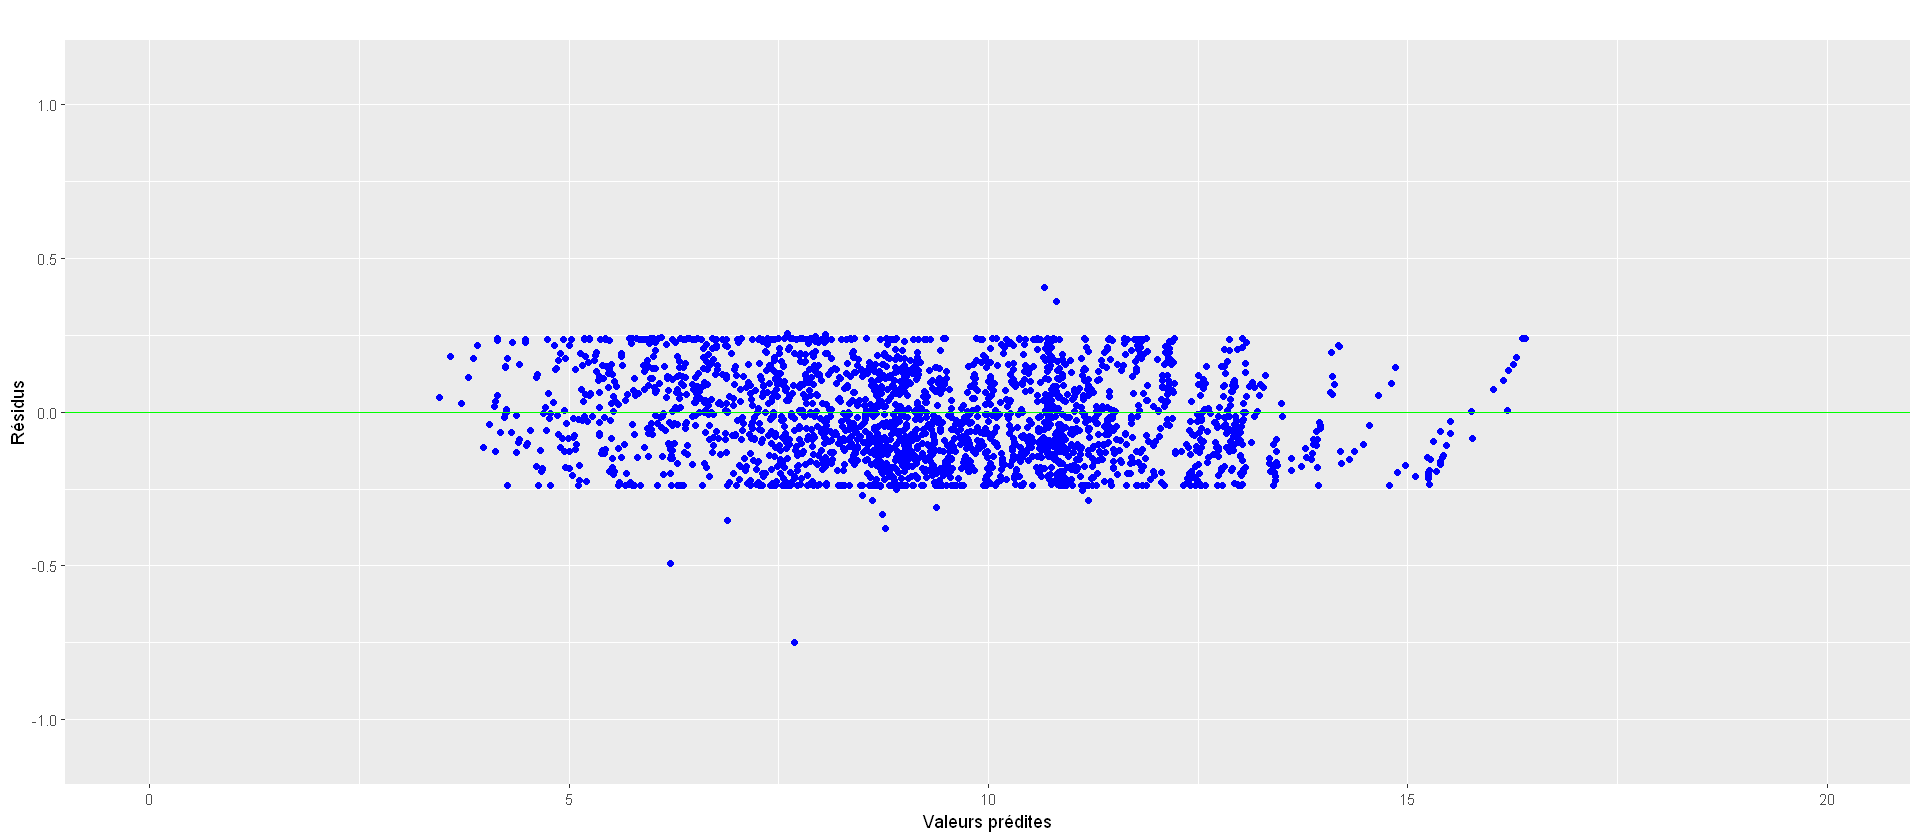

In [29]:
fit.svmr=svm.reg.poly.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [30]:
svm.reg.rad <- svm(Value_co2_emissions_kt_by_country ~ ., type = "eps-regression", data = datappr, kernel = "radial")
summary(svm.reg.poly)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr, 
    type = "eps-regression", kernel = "poly")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.005494505 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  2120






Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


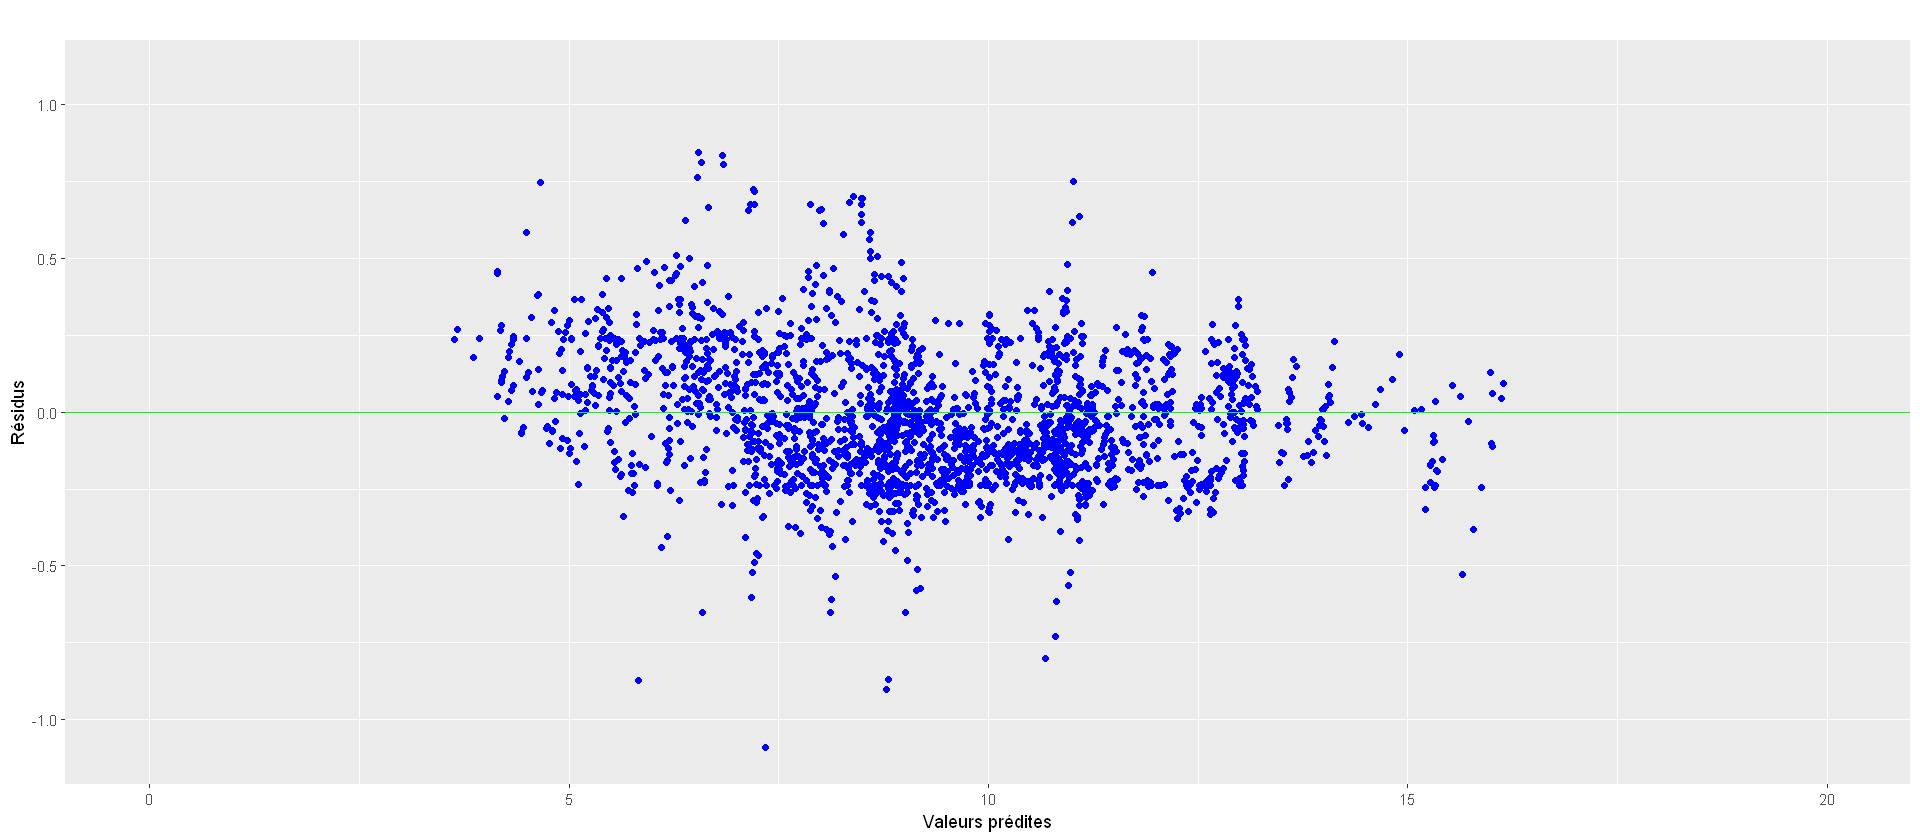

In [31]:
fit.svmr=svm.reg.rad$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [32]:
svm.reg.rad.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ ., type = "eps-regression", data = datappr, kernel = "radial", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6), gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.rad.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02  5.5

- best performance: 0.03835824 

- Detailed performance results:
   gamma cost      error dispersion
1   0.02  1.0 0.04675090 0.01563446
2   0.04  1.0 0.05512604 0.02475211
3   0.06  1.0 0.06577424 0.03102023
4   0.08  1.0 0.07797996 0.03619977
5   0.10  1.0 0.09236489 0.04205184
6   0.02  1.5 0.04260915 0.01440408
7   0.04  1.5 0.05166964 0.02226442
8   0.06  1.5 0.06155212 0.02697077
9   0.08  1.5 0.07303242 0.03076220
10  0.10  1.5 0.08637453 0.03519385
11  0.02  2.0 0.04072747 0.01384625
12  0.04  2.0 0.04983419 0.02029624
13  0.06  2.0 0.05897692 0.02405451
14  0.08  2.0 0.07011086 0.02726593
15  0.10  2.0 0.08294334 0.03079942
16  0.02  2.5 0.03960459 0.01339766
17  0.04  2.5 0.04898429 0.01941795
18  0.06  2.5 0.05878016 0.02381265
19  0.08  2.5 0.07007709 0.02719482
20  0.10  2.5 0.08292412 0.03077459
21  0.02  3.0 0.03909828 0.01297736
22  0.04  3.0 0.04896303

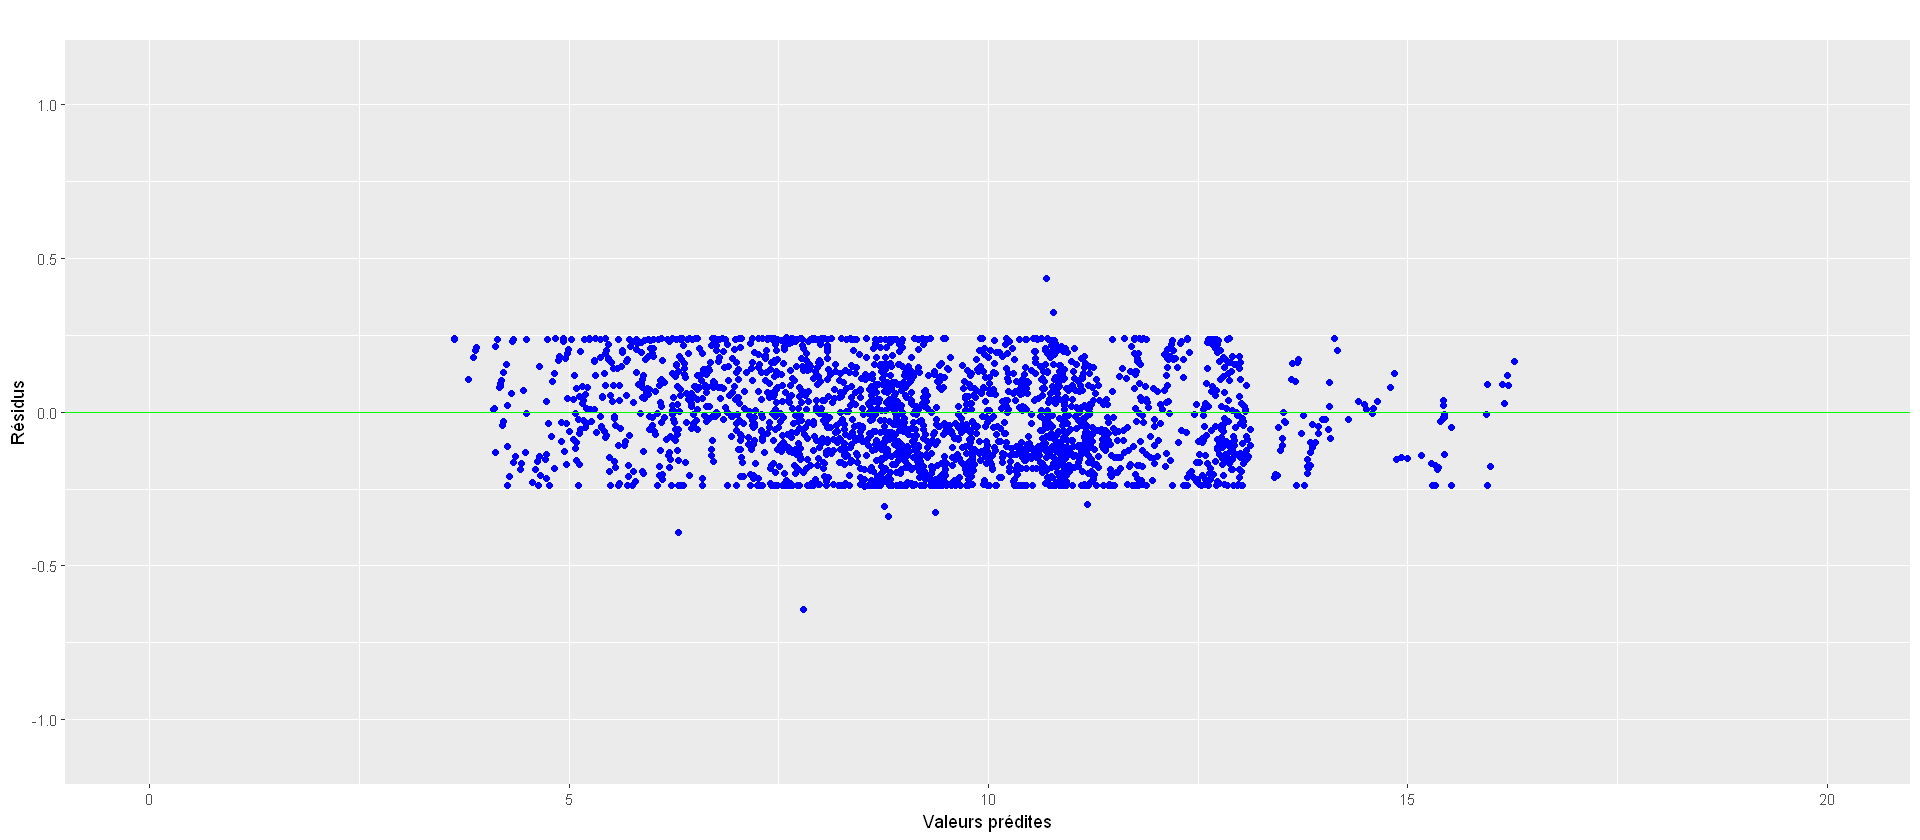

In [33]:
fit.svmr=svm.reg.rad.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [34]:
pred.svmr.lin.tune=predict(svm.reg.lin.tune$best.model,newdata=datestr)
pred.svmr.poly = predict(svm.reg.poly, newdata=datestr)
pred.svmr.poly.tune = predict(svm.reg.poly.tune$best.model, newdata = datestr)
pred.svmr.rad = predict(svm.reg.rad, newdata=datestr)
pred.svmr.rad.tune = predict(svm.reg.rad.tune$best.model, newdata = datestr)

paste("Tuned linear kernel:",sum((pred.svmr.lin.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default polynomial kernel:",sum((pred.svmr.poly-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned polynomial kernel:",sum((pred.svmr.poly.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default radial kernel:",sum((pred.svmr.rad-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned radial kernel:",sum((pred.svmr.rad.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")

[1] "Tuned linear kernel: 0.0303277072913294"

[1] "Default polynomial kernel: 4.39047853056114"

[1] "Tuned polynomial kernel: 0.0280955222874183"

[1] "Default radial kernel: 0.0517313932249299"

[1] "Tuned radial kernel: 0.0414931239110526"